<h1>Airbnb listing data for NYC 2019</h1>

<p>Airbnb is one of the largest short-term rental services in the world.  As such, they have millions of listings, many of which are in metropolitan areas like LA and NYC.  They currently do not have a public API to get listing data, but fortunately a recent <a href=https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data>dataset</a> is available on Kaggle specifically for NYC, and the raw source for this data can be found <a href="http://data.insideairbnb.com/united-states/ny/new-york-city/2019-12-04/data/listings.csv.gz">here</a>.  Data for other cities can also be found <a href="http://insideairbnb.com/get-the-data.html">here</a>.</p>

<p>Let's take a look at the <b>listings.csv</b> first, then we'll get to the time series data in <b>calendar.csv</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline
listings_df = pd.read_csv('listings.csv.gz')

c:\users\bruce\miniconda3\envs\capstone\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (61,62,94,95) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<br/>
<p>There are certain columns that have mixed data. Lets take a look at the general structure of the listings as well as those columns.</p>

In [2]:
print(listings_df.info())
print(listings_df.columns)
for col_index in [60, 61, 93, 94]:
    print(listings_df.columns[col_index])
listings_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50599 entries, 0 to 50598
Columns: 106 entries, id to reviews_per_month
dtypes: float64(22), int64(21), object(63)
memory usage: 40.9+ MB
None
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)
price
weekly_price
requires_license
license


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20191204162729,2019-12-07,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.39
1,3831,https://www.airbnb.com/rooms/3831,20191204162729,2019-12-07,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,f,moderate,f,f,1,1,0,0,4.67
2,5099,https://www.airbnb.com/rooms/5099,20191204162729,2019-12-06,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,...,f,f,moderate,t,t,1,1,0,0,0.60
3,5121,https://www.airbnb.com/rooms/5121,20191204162729,2019-12-06,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.38
4,5178,https://www.airbnb.com/rooms/5178,20191204162729,2019-12-05,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"You will use one large, furnished, private roo...",Please don’t expect the luxury here just a bas...,none,"Theater district, many restaurants around here.",...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,3.52


<br/>
<p>As we will see later, those mixed columns are not necessary.  There are also more entries than in the first dataset that we looked at (hopefully for more accurate modeling).  Let's drop the mixed columns and other columns that have irrelevant data, majority incomplete data, or data that can be found in other tables.</p>

In [3]:
# calendar values scraped in a small window between 2019-12-04 and 2019-12-07

listings_clean = listings_df.drop(['listing_url', 'scrape_id', 'last_scraped', 'name', 'space', \
    'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', \
    'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', \
    'host_name', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', \
    'host_acceptance_rate', 'host_since', 'host_listings_count', 'host_total_listings_count', \
    'host_verifications', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_has_profile_pic', \
    'host_identity_verified', 'host_neighbourhood', 'street', 'neighbourhood', 'city', 'state', 'zipcode', \
    'market', 'smart_location', 'country_code', 'country', 'is_location_exact', 'instant_bookable', \
    'is_business_travel_ready', 'license', 'jurisdiction_names', 'review_scores_value', 'requires_license', \
    'review_scores_communication', 'bed_type', 'weekly_price', 'monthly_price', \
    'security_deposit', 'guests_included', 'minimum_minimum_nights', 'maximum_minimum_nights', \
    'minimum_maximum_nights', 'maximum_maximum_nights', 'calendar_updated', 'has_availability', \
    'calendar_last_scraped', 'number_of_reviews_ltm', 'first_review', 'last_review', 'review_scores_accuracy', \
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location', 'cancellation_policy', \
    'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count', \
    'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', \
    'calculated_host_listings_count_shared_rooms', 'cleaning_fee', 'extra_people', \
    'square_feet', 'property_type', 'minimum_nights_avg_ntm', \
    'maximum_nights_avg_ntm', 'price', 'minimum_nights', 'maximum_nights', 'availability_30', \
    'availability_60', 'availability_90', 'availability_365'], axis=1)
print(listings_clean.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50599 entries, 0 to 50598
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            50599 non-null  int64  
 1   summary                       48367 non-null  object 
 2   neighbourhood_cleansed        50599 non-null  object 
 3   neighbourhood_group_cleansed  50599 non-null  object 
 4   latitude                      50599 non-null  float64
 5   longitude                     50599 non-null  float64
 6   room_type                     50599 non-null  object 
 7   accommodates                  50599 non-null  int64  
 8   bathrooms                     50548 non-null  float64
 9   bedrooms                      50536 non-null  float64
 10  beds                          50467 non-null  float64
 11  amenities                     50599 non-null  object 
 12  number_of_reviews             50599 non-null  int64  
 13  r

<br/>
<p>Columns <b>bathrooms, bedrooms, beds</b> have missing data, but thankfully not a lot.  We will try to clean that up.  Let's also rename a couple columns</p>

In [4]:
listings_clean.rename(columns={
    'neighbourhood_cleansed':'neighbourhood',
    'neighbourhood_group_cleansed': 'neighbourhood_group'
}, inplace=True)
listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50599 entries, 0 to 50598
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    50599 non-null  int64  
 1   summary               48367 non-null  object 
 2   neighbourhood         50599 non-null  object 
 3   neighbourhood_group   50599 non-null  object 
 4   latitude              50599 non-null  float64
 5   longitude             50599 non-null  float64
 6   room_type             50599 non-null  object 
 7   accommodates          50599 non-null  int64  
 8   bathrooms             50548 non-null  float64
 9   bedrooms              50536 non-null  float64
 10  beds                  50467 non-null  float64
 11  amenities             50599 non-null  object 
 12  number_of_reviews     50599 non-null  int64  
 13  review_scores_rating  39437 non-null  float64
 14  reviews_per_month     40379 non-null  float64
dtypes: float64(7), int6

<br/>
<p>Since the large majority of listings are homes/apts or private rooms, let's keep those listings.</p>

In [5]:
print(listings_clean.room_type.value_counts())
listings_clean = listings_clean.loc[
    (listings_clean.room_type == 'Entire home/apt') |
    (listings_clean.room_type == 'Private room')
]

Entire home/apt    26141
Private room       22785
Shared room         1256
Hotel room           417
Name: room_type, dtype: int64


<br/>
<p>We see some possible outliers for <b>accommodates, bathrooms, bedrooms, beds</b>.</p>

In [6]:
listings_clean.describe()

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,reviews_per_month
count,4.892600e+04,48926.000000,48926.000000,48926.000000,48879.000000,48863.000000,48798.000000,48926.000000,38259.000000,39182.000000
mean,2.117010e+07,40.728622,-73.950841,2.890161,1.147538,1.187872,1.548260,25.091546,93.968243,1.401085
std,1.242617e+07,0.054921,0.047503,1.910505,0.427225,0.771793,1.124263,47.629989,8.514763,1.670326
min,2.595000e+03,40.499790,-74.247870,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.010000
25%,9.977018e+06,40.689350,-73.982800,2.000000,1.000000,1.000000,1.000000,1.000000,92.000000,0.190000
50%,2.127600e+07,40.722460,-73.955020,2.000000,1.000000,1.000000,1.000000,6.000000,96.000000,0.730000
75%,3.244168e+07,40.762940,-73.934270,4.000000,1.000000,1.000000,2.000000,26.000000,100.000000,2.120000
max,4.058402e+07,40.916860,-73.712990,25.000000,15.500000,21.000000,40.000000,675.000000,100.000000,19.950000


<br/>
<p>Check for duplicate latitude and longitude value pairs, which most likely means duplicate listings</p>

In [7]:
# https://stackoverflow.com/questions/44481768/remove-duplicate-rows-from-pandas-dataframe-where-only-some-columns-have-the-sam
# https://stackoverflow.com/questions/16167829/in-pandas-how-can-i-reset-index-without-adding-a-new-column

listings_clean = listings_clean.drop_duplicates(subset=['latitude', 'longitude']).reset_index(drop=True)
listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48914 entries, 0 to 48913
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    48914 non-null  int64  
 1   summary               46766 non-null  object 
 2   neighbourhood         48914 non-null  object 
 3   neighbourhood_group   48914 non-null  object 
 4   latitude              48914 non-null  float64
 5   longitude             48914 non-null  float64
 6   room_type             48914 non-null  object 
 7   accommodates          48914 non-null  int64  
 8   bathrooms             48867 non-null  float64
 9   bedrooms              48851 non-null  float64
 10  beds                  48786 non-null  float64
 11  amenities             48914 non-null  object 
 12  number_of_reviews     48914 non-null  int64  
 13  review_scores_rating  38249 non-null  float64
 14  reviews_per_month     39172 non-null  float64
dtypes: float64(7), int6

<br/>
<p>Look at non-numerical columns to see if they can be categorized.</p>

In [8]:
# http://benalexkeen.com/mapping-categorical-data-in-pandas/

print(listings_clean.room_type.value_counts())
print(listings_clean.neighbourhood_group.value_counts())
print(listings_clean.neighbourhood.value_counts())


Entire home/apt    26134
Private room       22780
Name: room_type, dtype: int64
Manhattan        21255
Brooklyn         20194
Queens            5943
Bronx             1149
Staten Island      373
Name: neighbourhood_group, dtype: int64
Williamsburg          3903
Bedford-Stuyvesant    3823
Harlem                2691
Bushwick              2431
Upper West Side       1935
                      ... 
Willowbrook              1
New Dorp                 1
Woodrow                  1
Country Club             1
Fort Wadsworth           1
Name: neighbourhood, Length: 223, dtype: int64


In [9]:
home_listings = listings_clean.loc[listings_clean.room_type == 'Entire home/apt']
print(home_listings.bedrooms.value_counts())
print(home_listings.beds.value_counts())
print(home_listings.bathrooms.value_counts())

1.0     13018
2.0      6214
0.0      4140
3.0      2034
4.0       476
5.0       133
6.0        41
7.0        17
8.0        10
10.0        5
9.0         4
21.0        1
14.0        1
12.0        1
Name: bedrooms, dtype: int64
1.0     11605
2.0      8097
3.0      3258
4.0      1428
0.0       697
5.0       521
6.0       243
7.0       104
8.0        54
9.0        36
10.0       16
11.0       14
12.0       11
13.0        7
14.0        4
16.0        3
18.0        2
17.0        2
15.0        1
26.0        1
40.0        1
21.0        1
22.0        1
Name: beds, dtype: int64
1.0     22189
2.0      2255
1.5       889
2.5       339
3.0       208
3.5        77
4.0        49
0.0        37
0.5        26
4.5        23
5.0        13
6.0         5
5.5         4
7.0         2
8.0         1
7.5         1
6.5         1
15.5        1
Name: bathrooms, dtype: int64


<p>We see some outliers that may skew any modeling, so let's remove any listing over 10 <b>bedrooms</b>, 12 <b>beds</b>, and 5 <b>bathrooms</b>.  Realistically the vast majority of property owners are not listing super mansions.</p>

In [10]:
listings_clean = listings_clean.loc[
    (listings_clean.bedrooms <= 10) & (listings_clean.beds <=12) & (listings_clean.bathrooms <= 5)
]

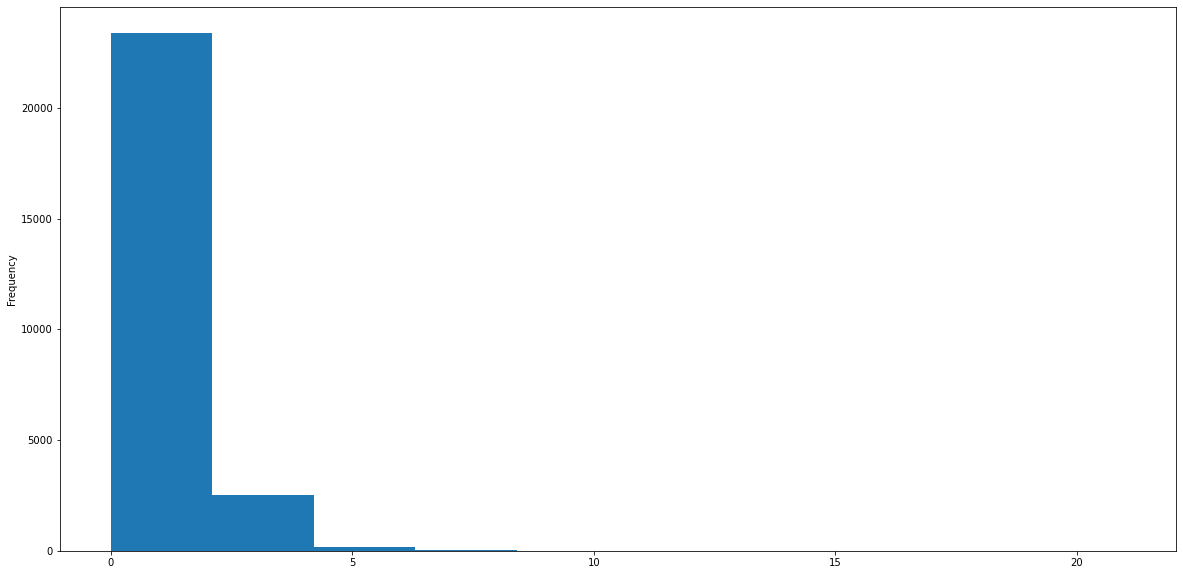

In [11]:
home_listings.bedrooms.plot(kind='hist', figsize=(20, 10))

<p>Home listings are heavily skewed toward single bedroom.  Perhaps we can approximate <b>bedrooms, bathrooms, beds</b> as exponential distributions.</p>
<p>Let's do the same analysis for single room type listings</p>

In [12]:
room_listings = listings_clean.loc[listings_clean.room_type != 'Entire home/apt']
print(room_listings.bedrooms.value_counts())
print(room_listings.beds.value_counts())
print(room_listings.bathrooms.value_counts())

1.0    21426
2.0      563
0.0      457
3.0      123
4.0       44
6.0       11
5.0        7
8.0        1
Name: bedrooms, dtype: int64
1.0     19078
2.0      2295
0.0       656
3.0       409
4.0       134
5.0        28
6.0        16
7.0         8
8.0         4
11.0        1
10.0        1
9.0         1
12.0        1
Name: beds, dtype: int64
1.0    18950
2.0     1708
1.5     1483
3.0      151
2.5      132
0.0       75
0.5       74
4.0       41
3.5       13
5.0        4
4.5        1
Name: bathrooms, dtype: int64


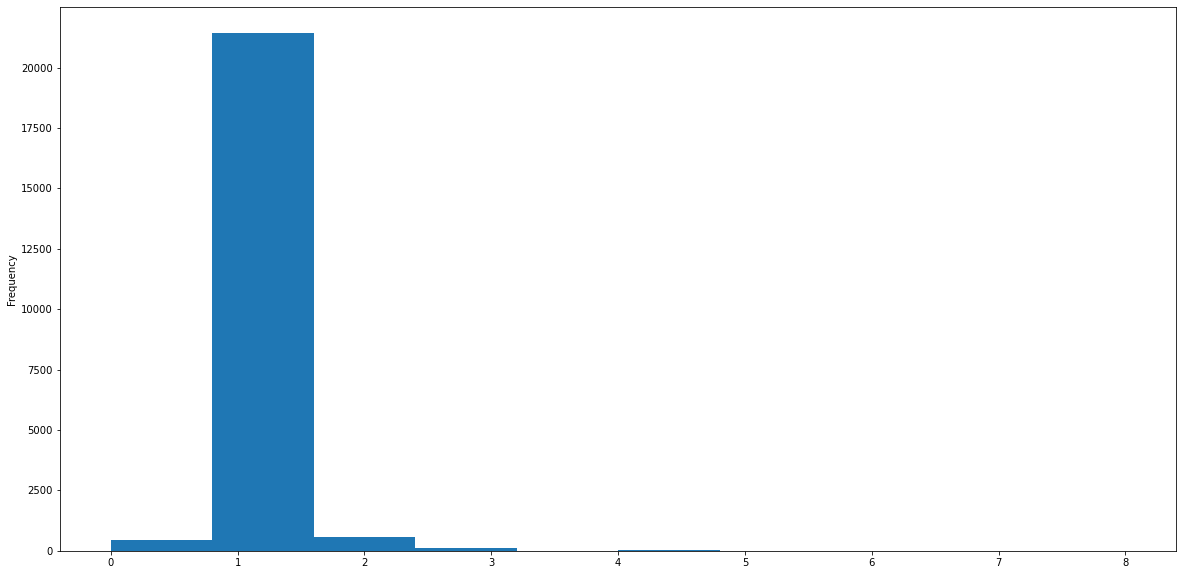

In [13]:
room_listings.bedrooms.plot(kind='hist', figsize=(20, 10))

<p>We get similar results to home listings, which is odd.  Perhaps some single room type listings were incorrectly listed.  That means we may not be able to rely on <b>room_type</b> as a factor in filling in any missing bedroom and bathroom values.</p>

<p>Let's do some data cleaning by filling in the missing <b>bedrooms, bathrooms, beds</b> values (disregarding homes/apts vs. single room since <b>room_type</b> is not always indicative of multiple rooms vs. one room).  0 values can still be considered valid (e.g. studio apt, shared living area, shared bathroom, non-bed type sleeping arrangment).  We will assume that 0.001 degree latitude or longitude <a href=https://gizmodo.com/how-precise-is-one-degree-of-longitude-or-latitude-1631241162">is about 100 m</a>.  Let's average over an area of 200 m radius from listings that have missing data.  We will group by <b>neighbourhood</b> when calculating the mean.</p>

In [14]:
lat_diff = 0.002
long_diff = 0.002
def avg_of_neighbors(row, col_name, col_index):
    item = row[col_index]
    room_type = row[5]
    lat = row[3]
    long = row[4]
    if math.isnan(item):
        item = listings_clean[col_name].loc[(listings_clean.latitude > lat - lat_diff) \
            & (listings_clean.latitude < lat + lat_diff) \
            & (listings_clean.longitude > long - long_diff) \
            & (listings_clean.longitude < long + long_diff)].groupby(by=listings_clean.neighbourhood).mean().round()[0]
        row[col_index] = item
    return row

listings_clean = listings_clean.apply(avg_of_neighbors, col_name='bathrooms', col_index=7, axis=1)
listings_clean = listings_clean.apply(avg_of_neighbors, col_name='bedrooms', col_index=8, axis=1)
listings_clean = listings_clean.apply(avg_of_neighbors, col_name='beds', col_index=9, axis=1)

In [15]:
print(listings_clean.bedrooms.value_counts())
print(listings_clean.bathrooms.value_counts())
print(listings_clean.beds.value_counts())

1.0     34418
2.0      6771
0.0      4593
3.0      2152
4.0       518
5.0       131
6.0        46
7.0        13
8.0         8
10.0        2
9.0         2
Name: bedrooms, dtype: int64
1.0    41080
2.0     3960
1.5     2372
2.5      467
3.0      354
0.0      110
0.5      100
3.5       88
4.0       85
4.5       24
5.0       14
Name: bathrooms, dtype: int64
1.0     30644
2.0     10381
3.0      3667
4.0      1562
0.0      1353
5.0       546
6.0       258
7.0       112
8.0        57
9.0        36
11.0       15
10.0       14
12.0        9
Name: beds, dtype: int64


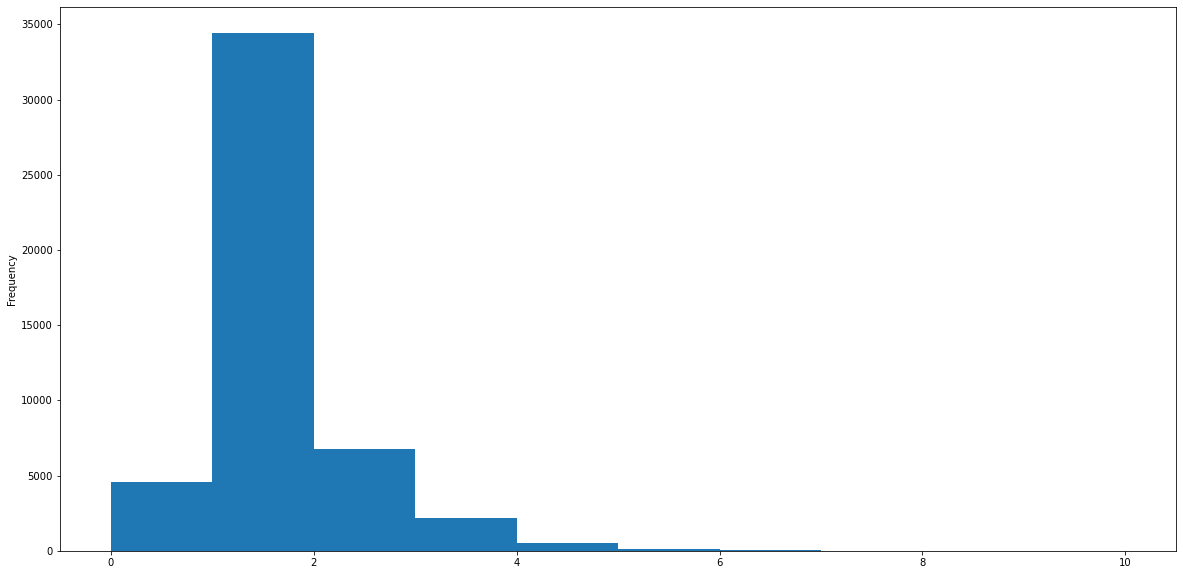

In [16]:
listings_clean.bedrooms.plot(kind='hist', figsize=(20, 10))

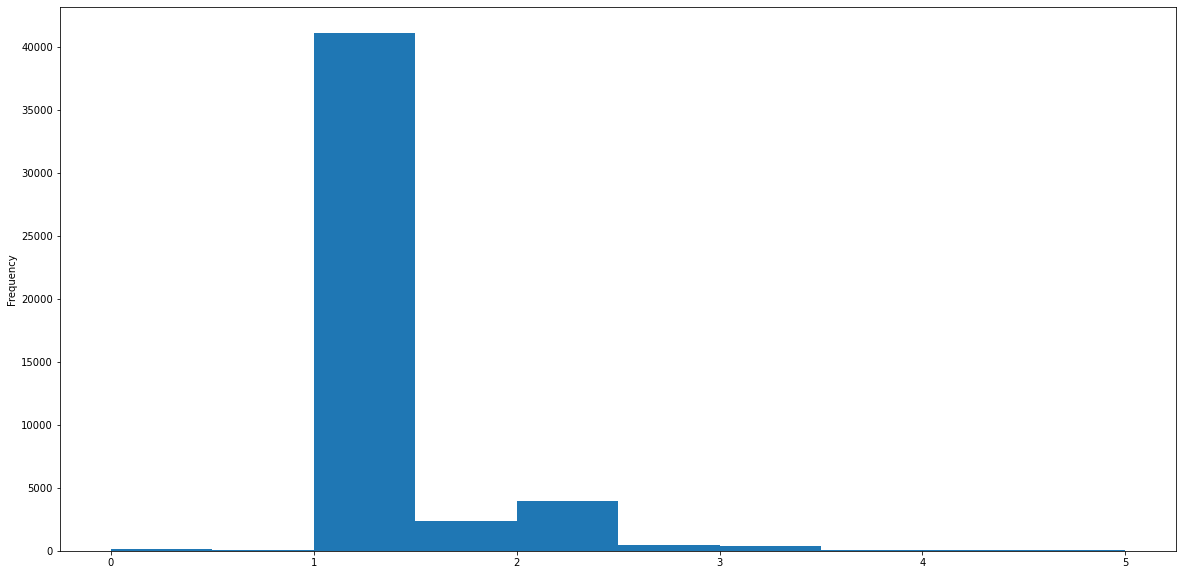

In [17]:
listings_clean.bathrooms.plot(kind='hist', figsize=(20, 10))

<p>After <b>bedrooms, bathrooms, beds</b> cleanup, we are able to see a bit more detail in the distributions.  They are approximately exponential (again skewed toward 1).</p>

<p>Final check on the listings for any missing data.</p>

In [18]:
listings_clean.info()
print(listings_clean.neighbourhood_group.value_counts())
print(listings_clean.neighbourhood.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48654 entries, 0 to 48913
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    48654 non-null  int64  
 1   summary               46577 non-null  object 
 2   neighbourhood         48654 non-null  object 
 3   neighbourhood_group   48654 non-null  object 
 4   latitude              48654 non-null  float64
 5   longitude             48654 non-null  float64
 6   room_type             48654 non-null  object 
 7   accommodates          48654 non-null  int64  
 8   bathrooms             48654 non-null  float64
 9   bedrooms              48654 non-null  float64
 10  beds                  48654 non-null  float64
 11  amenities             48654 non-null  object 
 12  number_of_reviews     48654 non-null  int64  
 13  review_scores_rating  38120 non-null  float64
 14  reviews_per_month     39034 non-null  float64
dtypes: float64(7), int6

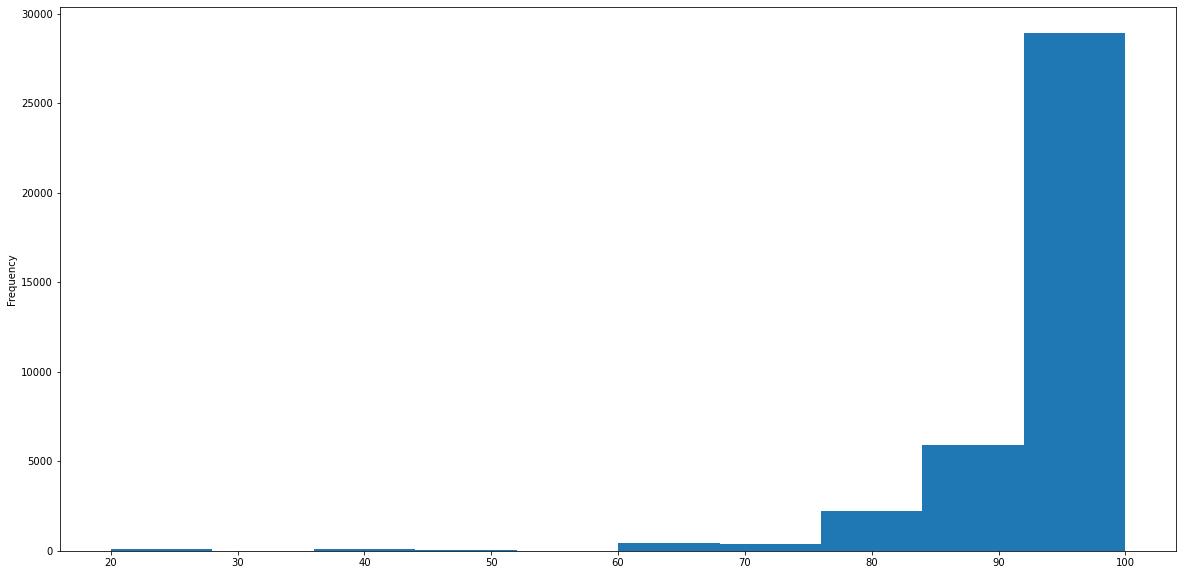

In [19]:
listings_clean.review_scores_rating.plot(kind='hist', figsize=(20, 10))

In [20]:
listings_clean['review_scores_rating'].fillna(listings_clean.review_scores_rating.mean(), inplace=True)

In [21]:
# pd.isna(listings_clean.summary).sum()
# listings_clean = listings_clean[listings_clean['summary'].notna()]

<p>One hot encode the <b>neighbourhood</b> values.  Drop non-numerical columns as well as listing IDs (which do not have any meaning for modeling).  Also convert <b>room_type</b> to binary valued <b>entire_home_apt</b>.</p>

In [22]:
def cleanup_neighbourhood(val):
    return val.replace(' ', '_').lower()

listings_clean['neighbourhood'] = listings_clean.neighbourhood.apply(cleanup_neighbourhood)
listings_clean['neighbourhood'] = listings_clean.neighbourhood.astype('category')
listings_clean['neighbourhood'] = listings_clean.neighbourhood.cat.codes

In [23]:
listings_clean['entire_home_apt'] = np.where(listings_clean.room_type == 'Entire home/apt', 1, 0)

In [24]:
import string

def cleanup_amenities(text):
    remove = string.punctuation
    remove = remove.replace("-", "").replace(",", "").replace("/", "")
    text = text.lower().translate({ord(char): None for char in remove})
    text = text.replace("translation missing enhostingamenity49", "")
    text = text.replace("translation missing enhostingamenity50", "")
    text = text.replace(",,", ",").replace("’", "").replace(' / ', ' ').replace('/', ' ')
    text = text.replace(' ', '_').replace('-', '_')
    return text.split(",")

listings_clean['amenities'] = listings_clean['amenities'].apply(cleanup_amenities)

In [25]:
amenities_sparse = listings_clean.amenities.str.join('|').str.get_dummies()
listings_clean = listings_clean.join(amenities_sparse)

In [26]:
import re
import string
import nltk
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

remove = string.punctuation

def tokenize_summary(text, n=1):
    text = str(text)
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    words = word_tokenize(text)
    tokens = [w for w in words if re.sub('[\W_]+', '', w)]
    grams = []
    for gram in ngrams(tokens, n):
        keep = True
        for subgram in gram:
            if subgram in stop_words or subgram in remove:
                keep = False
                break
        if keep:
            grams.append(gram)
    return grams

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bruce\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bruce\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bruce\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
listings_clean['summary_bigram'] = listings_clean['summary'].apply(tokenize_summary, n=2)
listings_clean['summary_trigram'] = listings_clean['summary'].apply(tokenize_summary, n=3)

In [28]:
cols = listings_clean.columns
list(cols).index('_toilet')

17

In [29]:
# cols = list(listings_clean.columns)
# def match_amenities(row, col_name, match_subgram=False):
#     grams = row[cols.index(col_name)]
#     for gram in grams:
#         if match_subgram:
#             for subgram in gram:
#                 if subgram in cols:
#                     row[cols.index(subgram)] = 1
#         if '_'.join(gram) in cols:
#             row[cols.index('_'.join(gram))] = 1
#     return row

In [30]:
# listings_clean.apply(match_amenities, col_name='summary_bigram', match_subgram=True, axis=1)
# listings_clean.apply(match_amenities, col_name='summary_trigram', match_subgram=False, axis=1)

In [31]:
# import re
# from nltk.tokenize import word_tokenize, punkt
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer

# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# stop_words = stopwords.words('english')
# stop_words = stop_words + ['ps', 'hello', 'go', 'everyone', 's', 'sf', 'nt', 'pmam', 'wown', 'see']
# lemmatizer = WordNetLemmatizer()

# def tokenize_summary(text):
#     text = re.sub(r'\d+', '', str(text))
#     tokens = word_tokenize(text)
#     tokens = list(filter(lambda token: punkt.PunktToken(token).is_non_punct, tokens))
#     tokens = [token.translate({ord(char): None for char in remove}) for token in tokens]
#     tokens = [token.lower() for token in tokens]
#     tokens = list(filter(lambda token: token not in stop_words, tokens))
#     tokens = [lemmatizer.lemmatize(token) for token in tokens]
#     return tokens

# text = listings_clean.summary[11]

# tokenize_summary(text)

<br/>
<p>Now let's take a look at the time series data for availability, price, and nights.  <a href=http://data.insideairbnb.com/united-states/ny/new-york-city/2019-12-04/data/calendar.csv.gz><b>Calendar.csv</b></a> comes from the same <a href="http://insideairbnb.com/get-the-data.html">source</a> as <b>listings.csv</b></p>.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline
calendar_df = pd.read_csv('calendar.csv.gz', parse_dates=['date'])

<br/>
<p>This time we don't have to deal with columns of mixed data, nor do we have a large number of columns like in the <b>listings_clean</b> table.  We do, however, have over 18 million entries, which makes sense given that this is time series data over a year for 50,000+ listings.  We will have to clean up availability and price.</p>

In [33]:
print(calendar_df.info())
print(calendar_df.columns)
calendar_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18470156 entries, 0 to 18470155
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           object        
 4   adjusted_price  object        
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 986.4+ MB
None
Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,19812,2019-12-05,f,$105.00,$105.00,3.0,90.0
1,2595,2019-12-06,f,$175.00,$175.00,10.0,1125.0
2,2595,2019-12-07,f,$175.00,$175.00,10.0,1125.0
3,2595,2019-12-08,f,$175.00,$175.00,10.0,1125.0
4,2595,2019-12-09,f,$175.00,$175.00,10.0,1125.0


<br/>
<p>On checking for equal distribution of all listings over the relevant time period (assumed for this step to be a year), we see a problem with <b>listing_id</b> 15268792.  Let's just remove it, since it is not worth the effort to build a year's worth of data for that one listing.</p>

In [34]:
print(calendar_df.listing_id.value_counts())
calendar_clean = calendar_df[calendar_df.listing_id != 15268792]


25512622    368
32678719    368
28138840    368
30069091    368
24285044    368
           ... 
27926502    365
18992796    365
21677053    365
30226855    365
15268792      6
Name: listing_id, Length: 50599, dtype: int64


<br/>
<p>Since this data set was captured in 2019, we must clean up dates that have year 2020.  Then drop any duplicate <b>listing_id, date</b> combos.  Then check that all days add up to a calendar year for each <b>listing_id</b>.</p>

In [35]:
# https://stackoverflow.com/questions/50674011/replace-the-year-in-pandas-datetime-column
# https://stackoverflow.com/questions/28773342/truncate-timestamp-column-to-hour-precision-in-pandas-dataframe

calendar_clean['date'] = calendar_clean['date'].mask(calendar_clean['date'].dt.year == 2020,
                            calendar_clean['date'] - pd.to_timedelta(365, unit='D') + pd.to_timedelta(12, unit='h'))
# calendar_clean['date'] = calendar_clean['date'] - pd.to_timedelta(365, unit='D') + pd.to_timedelta(12, unit='h')
calendar_clean['date'] = calendar_clean['date'].dt.floor('D')

c:\users\bruce\miniconda3\envs\capstone\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\bruce\miniconda3\envs\capstone\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [36]:
calendar_clean = calendar_clean.drop_duplicates(subset=['listing_id', 'date']).reset_index(drop=True)
print(calendar_clean.listing_id.value_counts())

327521      365
7756711     365
31877537    365
14961122    365
201992      365
           ... 
37055580    365
13186007    365
18549136    365
34646244    365
30226855    365
Name: listing_id, Length: 50598, dtype: int64


<br/>
<p>Verify that all listing_id values can be found in the <b>listings_clean</b> table.  If not, then remove rows with listing_id values don't exist in the other table.</p>

In [37]:
# https://stackoverflow.com/questions/28901683/pandas-get-rows-which-are-not-in-other-dataframe

ids_match = calendar_clean.listing_id.isin(listings_clean.id)
print(ids_match.value_counts())

True     17758345
False      709925
Name: listing_id, dtype: int64


In [38]:
calendar_clean = calendar_clean[calendar_clean.listing_id.isin(listings_clean.id)]
calendar_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17758345 entries, 0 to 18468269
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           object        
 4   adjusted_price  object        
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 1.1+ GB


<br/>
<p>Translate all <b>available</b> values to 1 (available) or 0 (unavailable).</p>

In [39]:
print(calendar_clean.available.value_counts())
calendar_clean['available'] = np.where(calendar_clean.available == 't', 1, 0)
print(calendar_clean.available.value_counts())

f    11990442
t     5767903
Name: available, dtype: int64
0    11990442
1     5767903
Name: available, dtype: int64


<br/>
<p>Less than 1% of the entries have <b>adjusted_price</b> not equal to <b>price</b>, but we will use <b>adjusted_price</b> anyway and clean it up to be numerical</p>

In [40]:
calendar_clean[calendar_clean.price != calendar_clean.adjusted_price]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
8232,20734,2019-12-06,0,$134.00,$127.00,3.0,29.0
8419,20734,2019-12-07,0,$134.00,$127.00,3.0,29.0
8420,20734,2019-12-08,0,$134.00,$127.00,3.0,29.0
8421,20734,2019-12-09,0,$134.00,$127.00,3.0,29.0
8422,20734,2019-12-10,0,$134.00,$127.00,3.0,29.0
...,...,...,...,...,...,...,...
18402175,40482221,2019-12-01,0,$74.00,$63.00,1.0,365.0
18402176,40482221,2019-12-02,0,$74.00,$63.00,1.0,365.0
18402177,40482221,2019-12-03,0,$74.00,$63.00,1.0,365.0
18402178,40482221,2019-12-04,0,$74.00,$63.00,1.0,365.0


In [41]:
calendar_clean['price_cleansed'] = calendar_clean.adjusted_price\
.str.replace('$', '').str.replace(',', '').astype('float')

In [42]:
calendar_clean = calendar_clean.drop(['adjusted_price', 'price'], axis=1)
calendar_clean.rename(columns={'price_cleansed': 'price'}, inplace=True)

<br/>
<p>Now is a good time to check the state of the table.  All columns except for <b>maximum_nights</b> seem to have useful data.  The large majority of listings allowing over 1000 nights for a short-term rental means that, for practical purposes, it is limitless.</p>

In [43]:
calendar_clean.info()
calendar_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17758345 entries, 0 to 18468269
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       int32         
 3   minimum_nights  float64       
 4   maximum_nights  float64       
 5   price           float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1)
memory usage: 880.7 MB


,listing_id,date,available,minimum_nights,maximum_nights,price
0,19812,2019-12-05,0,3.0,90.0,105.0
1,2595,2019-12-06,0,10.0,1125.0,175.0
2,2595,2019-12-07,0,10.0,1125.0,175.0
3,2595,2019-12-08,0,10.0,1125.0,175.0
4,2595,2019-12-09,0,10.0,1125.0,175.0


In [44]:
calendar_clean.describe()

,listing_id,available,minimum_nights,maximum_nights,price
count,1.775834e+07,1.775834e+07,1.775772e+07,1.775772e+07,1.775745e+07
mean,2.114076e+07,3.247996e-01,8.592398e+00,2.748719e+05,1.560488e+02
std,1.239078e+07,4.682999e-01,3.037026e+01,2.423063e+07,2.568249e+02
min,2.595000e+03,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,9.979270e+06,0.000000e+00,2.000000e+00,2.900000e+01,7.000000e+01
50%,2.125183e+07,0.000000e+00,3.000000e+00,1.125000e+03,1.100000e+02
75%,3.234744e+07,1.000000e+00,5.000000e+00,1.125000e+03,1.800000e+02
max,4.058402e+07,1.000000e+00,3.456000e+03,2.147484e+09,1.000000e+04


In [45]:
calendar_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17758345 entries, 0 to 18468269
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       int32         
 3   minimum_nights  float64       
 4   maximum_nights  float64       
 5   price           float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1)
memory usage: 880.7 MB


<br/>
<p>Since travel patterns are usually seasonal, let's average availability, min nights required, and price over each season and the whole year.</p>

In [46]:
available_year_avg = calendar_clean.groupby(by='listing_id').available.mean()
available_winter_avg = calendar_clean[(calendar_clean.date.dt.month == 1) | (calendar_clean.date.dt.month == 2) \
    | (calendar_clean.date.dt.month == 12)].groupby(by='listing_id').available.mean()
available_spring_avg = calendar_clean[(calendar_clean.date.dt.month >= 3) & (calendar_clean.date.dt.month <= 5)]\
.groupby(by='listing_id').available.mean()
available_summer_avg = calendar_clean[(calendar_clean.date.dt.month >= 6) & (calendar_clean.date.dt.month <= 8)]\
.groupby(by='listing_id').available.mean()
available_fall_avg = calendar_clean[(calendar_clean.date.dt.month >= 9) & (calendar_clean.date.dt.month <= 11)]\
.groupby(by='listing_id').available.mean()
available_jan_avg = calendar_clean[calendar_clean.date.dt.month == 1].groupby(by='listing_id').available.mean()
available_jun_avg = calendar_clean[calendar_clean.date.dt.month == 6].groupby(by='listing_id').available.mean()
available_dec_avg = calendar_clean[calendar_clean.date.dt.month == 12].groupby(by='listing_id').available.mean()

calendar_averages = pd.DataFrame(available_year_avg)
calendar_averages.rename(columns={'available': 'available_year_avg'}, inplace=True)
calendar_averages['available_winter_avg'] = available_winter_avg
calendar_averages['available_spring_avg'] = available_spring_avg
calendar_averages['available_summer_avg'] = available_summer_avg
calendar_averages['available_fall_avg'] = available_fall_avg
calendar_averages['available_jan_avg'] = available_jan_avg
calendar_averages['available_jun_avg'] = available_jun_avg
calendar_averages['available_dec_avg'] = available_dec_avg


In [47]:
min_nights_year_avg = calendar_clean.groupby(by='listing_id')['minimum_nights'].mean()
min_nights_winter_avg = calendar_clean[(calendar_clean.date.dt.month == 1) | (calendar_clean.date.dt.month == 2) \
    | (calendar_clean.date.dt.month == 12)].groupby(by='listing_id')['minimum_nights'].mean()
min_nights_spring_avg = calendar_clean[(calendar_clean.date.dt.month >= 3) & (calendar_clean.date.dt.month <= 5)]\
.groupby(by='listing_id')['minimum_nights'].mean()
min_nights_summer_avg = calendar_clean[(calendar_clean.date.dt.month >= 6) & (calendar_clean.date.dt.month <= 8)]\
.groupby(by='listing_id')['minimum_nights'].mean()
min_nights_fall_avg = calendar_clean[(calendar_clean.date.dt.month >= 9) & (calendar_clean.date.dt.month <= 11)]\
.groupby(by='listing_id')['minimum_nights'].mean()
min_nights_jan_avg = calendar_clean[calendar_clean.date.dt.month == 1].groupby(by='listing_id')['minimum_nights'].mean()
min_nights_jun_avg = calendar_clean[calendar_clean.date.dt.month == 6].groupby(by='listing_id')['minimum_nights'].mean()
min_nights_dec_avg = calendar_clean[calendar_clean.date.dt.month == 12].groupby(by='listing_id')['minimum_nights'].mean()

calendar_averages['min_nights_year_avg'] = min_nights_year_avg
calendar_averages['min_nights_winter_avg'] = min_nights_winter_avg
calendar_averages['min_nights_spring_avg'] = min_nights_spring_avg
calendar_averages['min_nights_summer_avg'] = min_nights_summer_avg
calendar_averages['min_nights_fall_avg'] = min_nights_fall_avg
calendar_averages['min_nights_jan_avg'] = min_nights_jan_avg
calendar_averages['min_nights_jun_avg'] = min_nights_jun_avg
calendar_averages['min_nights_dec_avg'] = min_nights_dec_avg

In [48]:
price_year_avg = calendar_clean.groupby(by='listing_id')['price'].mean()
price_winter_avg = calendar_clean[(calendar_clean.date.dt.month == 1) | (calendar_clean.date.dt.month == 2) \
    | (calendar_clean.date.dt.month == 12)].groupby(by='listing_id')['price'].mean()
price_spring_avg = calendar_clean[(calendar_clean.date.dt.month >= 3) & (calendar_clean.date.dt.month <= 5)]\
.groupby(by='listing_id')['price'].mean()
price_summer_avg = calendar_clean[(calendar_clean.date.dt.month >= 6) & (calendar_clean.date.dt.month <= 8)]\
.groupby(by='listing_id')['price'].mean()
price_fall_avg = calendar_clean[(calendar_clean.date.dt.month >= 9) & (calendar_clean.date.dt.month <= 11)]\
.groupby(by='listing_id')['price'].mean()
price_jan_avg = calendar_clean[calendar_clean.date.dt.month == 1].groupby(by='listing_id')['price'].mean()
price_jun_avg = calendar_clean[calendar_clean.date.dt.month == 6].groupby(by='listing_id')['price'].mean()
price_dec_avg = calendar_clean[calendar_clean.date.dt.month == 12].groupby(by='listing_id')['price'].mean()

calendar_averages['price_year_avg'] = price_year_avg
calendar_averages['price_winter_avg'] = price_winter_avg
calendar_averages['price_spring_avg'] = price_spring_avg
calendar_averages['price_summer_avg'] = price_summer_avg
calendar_averages['price_fall_avg'] = price_fall_avg
calendar_averages['price_jan_avg'] = price_jan_avg
calendar_averages['price_jun_avg'] = price_jun_avg
calendar_averages['price_dec_avg'] = price_dec_avg

In [49]:
calendar_averages.info()
calendar_averages.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48653 entries, 2595 to 40584021
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   available_year_avg     48653 non-null  float64
 1   available_winter_avg   48653 non-null  float64
 2   available_spring_avg   48653 non-null  float64
 3   available_summer_avg   48653 non-null  float64
 4   available_fall_avg     48653 non-null  float64
 5   available_jan_avg      48653 non-null  float64
 6   available_jun_avg      48653 non-null  float64
 7   available_dec_avg      48653 non-null  float64
 8   min_nights_year_avg    48653 non-null  float64
 9   min_nights_winter_avg  48653 non-null  float64
 10  min_nights_spring_avg  48653 non-null  float64
 11  min_nights_summer_avg  48653 non-null  float64
 12  min_nights_fall_avg    48653 non-null  float64
 13  min_nights_jan_avg     48653 non-null  float64
 14  min_nights_jun_avg     48653 non-null  float64
 

,available_year_avg,available_winter_avg,available_spring_avg,available_summer_avg,available_fall_avg,available_jan_avg,available_jun_avg,available_dec_avg,min_nights_year_avg,min_nights_winter_avg,...,min_nights_jun_avg,min_nights_dec_avg,price_year_avg,price_winter_avg,price_spring_avg,price_summer_avg,price_fall_avg,price_jan_avg,price_jun_avg,price_dec_avg
count,48653.000000,48653.000000,48653.000000,48653.000000,48653.000000,48653.000000,48653.000000,48653.000000,48653.000000,48653.000000,...,48653.000000,48653.000000,48653.000000,48653.000000,48651.000000,48653.000000,48650.000000,48651.000000,48653.000000,48653.000000
mean,0.324800,0.367686,0.366178,0.292422,0.273285,0.416534,0.292684,0.239441,8.592328,8.046683,...,8.853276,7.725376,156.048575,149.758814,155.145125,157.516932,161.701132,146.408156,158.008192,156.069265
std,0.371980,0.368098,0.447648,0.440315,0.440492,0.444207,0.438403,0.294223,28.881280,25.667699,...,33.876058,23.435944,236.460285,228.505797,236.534638,233.831249,291.482058,228.250163,234.747373,234.521394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.991781,1.966667,...,2.000000,1.903226,70.000000,69.000000,70.000000,70.000000,70.000000,67.903226,70.000000,70.000000
50%,0.167123,0.266667,0.043478,0.000000,0.000000,0.129032,0.000000,0.129032,3.000000,3.000000,...,3.000000,3.000000,110.000000,108.166667,110.000000,110.673913,110.000000,105.000000,110.666667,110.516129
75%,0.665753,0.722222,1.000000,0.956522,0.989011,0.935484,1.000000,0.419355,5.000000,5.000000,...,5.000000,5.000000,180.000000,175.000000,180.000000,181.000000,180.000000,170.000000,181.100000,180.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1494.104110,1997.166667,...,3337.000000,1574.225806,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000


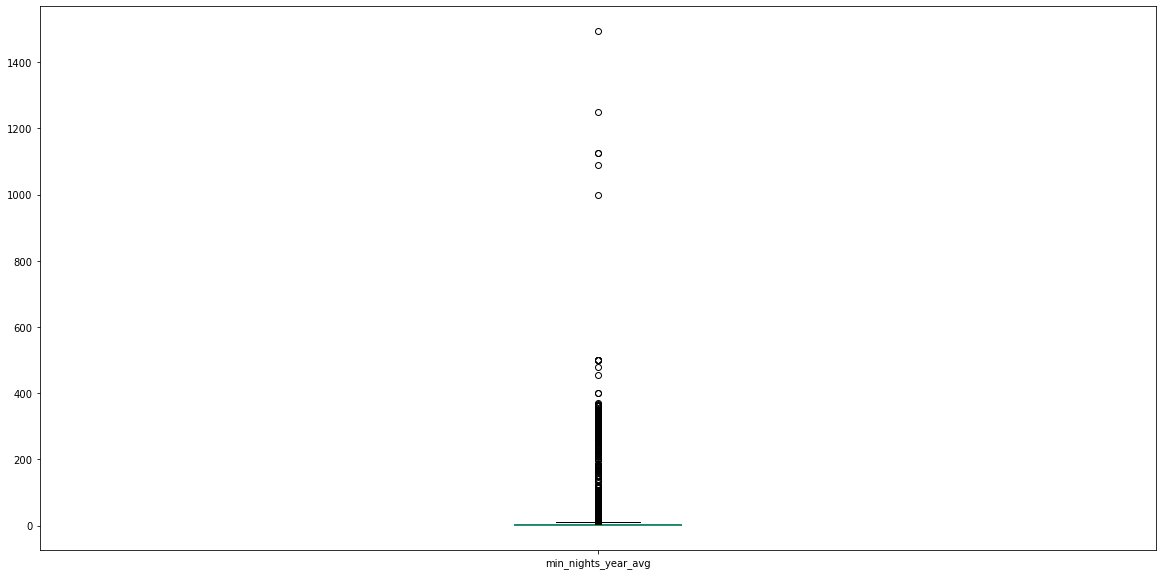

In [50]:
calendar_averages.min_nights_year_avg.plot(kind='box', figsize=(20, 10))

<p>1000+ <b>minimum_nights</b> is extremely high and unrealistic.  Box plot shows outliers above 10 nights, and the 3rd quartile level is 5 nights.</p>

<p>Let's drop any entry that averages over 30 minimum nights.</p>

In [51]:
calendar_averages = calendar_averages.loc[
    (calendar_averages.min_nights_year_avg <= 30) & 
    (calendar_averages.min_nights_winter_avg <= 30) &
    (calendar_averages.min_nights_spring_avg <= 30) &
    (calendar_averages.min_nights_summer_avg <= 30) &
    (calendar_averages.min_nights_fall_avg <= 30) &
    (calendar_averages.min_nights_jan_avg <= 30) &
    (calendar_averages.min_nights_jun_avg <= 30) &
    (calendar_averages.min_nights_dec_avg <= 30)
]

<br/>
<p>The box plot shows outliers above \$600 average nightly price, and the 3rd quartile level is \$180.  Let's drop all listings above \$600</p>

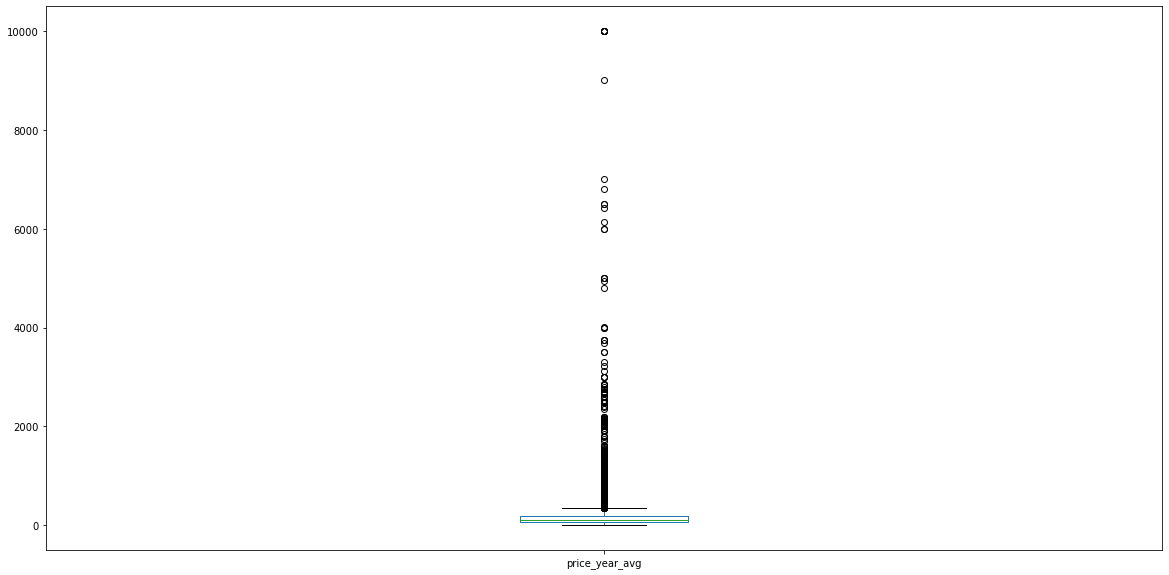

In [52]:
calendar_averages.price_year_avg.plot(kind='box', figsize=(20, 10))

In [53]:
calendar_averages = calendar_averages.loc[
    (calendar_averages.price_year_avg <= 600) &
    (calendar_averages.price_winter_avg <= 600) &
    (calendar_averages.price_spring_avg <= 600) &
    (calendar_averages.price_summer_avg <= 600) &
    (calendar_averages.price_fall_avg <= 600) &
    (calendar_averages.price_jan_avg <= 600) &
    (calendar_averages.price_jun_avg <= 600) &
    (calendar_averages.price_dec_avg <= 600)
]

In [54]:
calendar_averages.info()
calendar_averages.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46401 entries, 2595 to 40584021
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   available_year_avg     46401 non-null  float64
 1   available_winter_avg   46401 non-null  float64
 2   available_spring_avg   46401 non-null  float64
 3   available_summer_avg   46401 non-null  float64
 4   available_fall_avg     46401 non-null  float64
 5   available_jan_avg      46401 non-null  float64
 6   available_jun_avg      46401 non-null  float64
 7   available_dec_avg      46401 non-null  float64
 8   min_nights_year_avg    46401 non-null  float64
 9   min_nights_winter_avg  46401 non-null  float64
 10  min_nights_spring_avg  46401 non-null  float64
 11  min_nights_summer_avg  46401 non-null  float64
 12  min_nights_fall_avg    46401 non-null  float64
 13  min_nights_jan_avg     46401 non-null  float64
 14  min_nights_jun_avg     46401 non-null  float64
 

,available_year_avg,available_winter_avg,available_spring_avg,available_summer_avg,available_fall_avg,available_jan_avg,available_jun_avg,available_dec_avg,min_nights_year_avg,min_nights_winter_avg,...,min_nights_jun_avg,min_nights_dec_avg,price_year_avg,price_winter_avg,price_spring_avg,price_summer_avg,price_fall_avg,price_jan_avg,price_jun_avg,price_dec_avg
count,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000,...,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000
mean,0.311556,0.358653,0.353335,0.276291,0.258390,0.408007,0.277014,0.230060,5.571613,5.560203,...,5.575560,5.517929,134.750157,130.735378,134.613328,136.989974,136.594720,128.073883,137.198926,135.792997
std,0.366851,0.365035,0.443839,0.432568,0.432681,0.442277,0.430603,0.287246,8.099831,8.063092,...,8.136276,8.018748,91.034516,87.541580,91.885193,93.981040,93.639116,85.865829,94.519306,92.722882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.572603,1.666667,...,1.433333,1.580645,70.000000,68.000000,69.521739,70.000000,70.000000,66.612903,70.000000,69.806452
50%,0.145205,0.233333,0.043478,0.000000,0.000000,0.129032,0.000000,0.129032,2.715068,2.688889,...,2.733333,2.677419,107.547945,105.000000,106.608696,110.000000,109.285714,101.645161,110.000000,109.000000
75%,0.602740,0.711111,0.978261,0.869565,0.857143,0.935484,0.866667,0.387097,5.000000,5.000000,...,5.000000,5.000000,175.000000,169.633333,175.000000,175.000000,175.000000,163.838710,175.000000,175.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,...,30.000000,30.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000


<p>We still have to deal with price outliers, but let's merge the <b>calendar_averages</b> and <b>listings_clean</b> tables on listing ID so we can use geographic data to average over nearest neighbors.</p>

In [55]:
# https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/

listings_clean = listings_clean.loc[listings_clean.id != 15268792]
listings_clean = listings_clean.loc[listings_clean.id.isin(calendar_averages.index)]
listings_merge = pd.merge(listings_clean, calendar_averages, left_on='id', right_index=True)

In [56]:
listings_merge.info()
listings_merge.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46401 entries, 0 to 48913
Columns: 169 entries, id to price_dec_avg
dtypes: float64(31), int16(1), int32(1), int64(130), object(6)
memory usage: 59.7+ MB


,id,summary,neighbourhood,neighbourhood_group,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,...,min_nights_jun_avg,min_nights_dec_avg,price_year_avg,price_winter_avg,price_spring_avg,price_summer_avg,price_fall_avg,price_jan_avg,price_jun_avg,price_dec_avg
0,2595,"Beautiful, spacious skylit studio in the heart...",129,Manhattan,40.75362,-73.98377,Entire home/apt,1,1.0,0.0,...,10.0,10.0,196.334247,177.255556,176.152174,215.728261,216.0,175.000000,215.1,181.548387
1,3831,Urban retreat: enjoy 500 s.f. floor in 1899 br...,41,Brooklyn,40.68514,-73.95976,Entire home/apt,3,1.0,1.0,...,1.0,1.0,86.224658,88.911111,86.032609,85.000000,85.0,86.516129,85.0,91.645161
2,5099,My large 1 bedroom apartment has a true New Yo...,139,Manhattan,40.74767,-73.97500,Entire home/apt,2,1.0,1.0,...,3.0,3.0,206.164384,225.000000,200.000000,200.000000,200.0,216.129032,200.0,256.451613
4,5178,Please don’t expect the luxury here just a bas...,97,Manhattan,40.76489,-73.98493,Private room,2,1.0,1.0,...,2.0,2.0,78.279452,77.233333,77.869565,79.000000,79.0,76.322581,79.0,79.000000
5,5203,"Our best guests are seeking a safe, clean, spa...",204,Manhattan,40.80178,-73.96723,Private room,1,1.0,1.0,...,2.0,2.0,78.106849,75.222222,77.163043,80.000000,80.0,75.000000,80.0,75.645161


In [57]:
listings_merge.describe()

,id,neighbourhood,latitude,longitude,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,...,min_nights_jun_avg,min_nights_dec_avg,price_year_avg,price_winter_avg,price_spring_avg,price_summer_avg,price_fall_avg,price_jan_avg,price_jun_avg,price_dec_avg
count,4.640100e+04,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000,...,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000
mean,2.100278e+07,107.425788,40.728301,-73.949952,2.814573,1.125073,1.156268,1.506153,25.943600,93.995482,...,5.575560,5.517929,134.750157,130.735378,134.613328,136.989974,136.594720,128.073883,137.198926,135.792997
std,1.235335e+07,69.750280,0.055364,0.047765,1.733721,0.366010,0.697562,0.998258,48.428762,7.472623,...,8.136276,8.018748,91.034516,87.541580,91.885193,93.981040,93.639116,85.865829,94.519306,92.722882
min,2.595000e+03,0.000000,40.499790,-74.247870,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.920626e+06,52.000000,40.688820,-73.982050,2.000000,1.000000,1.000000,1.000000,1.000000,93.000000,...,1.433333,1.580645,70.000000,68.000000,69.521739,70.000000,70.000000,66.612903,70.000000,69.806452
50%,2.106716e+07,96.000000,40.721940,-73.954330,2.000000,1.000000,1.000000,1.000000,6.000000,94.000000,...,2.733333,2.677419,107.547945,105.000000,106.608696,110.000000,109.285714,101.645161,110.000000,109.000000
75%,3.201758e+07,180.000000,40.763100,-73.933100,4.000000,1.000000,1.000000,2.000000,27.000000,99.000000,...,5.000000,5.000000,175.000000,169.633333,175.000000,175.000000,175.000000,163.838710,175.000000,175.000000
max,4.058402e+07,222.000000,40.916860,-73.712990,16.000000,5.000000,10.000000,12.000000,675.000000,100.000000,...,30.000000,30.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000


<br/>
<p>Availability seems to be a heavy tailed distribution, with most listings unavailable over the year.  This suggests a high average utilization of rentals in NYC, but there are still a lot of rentals available.</p>

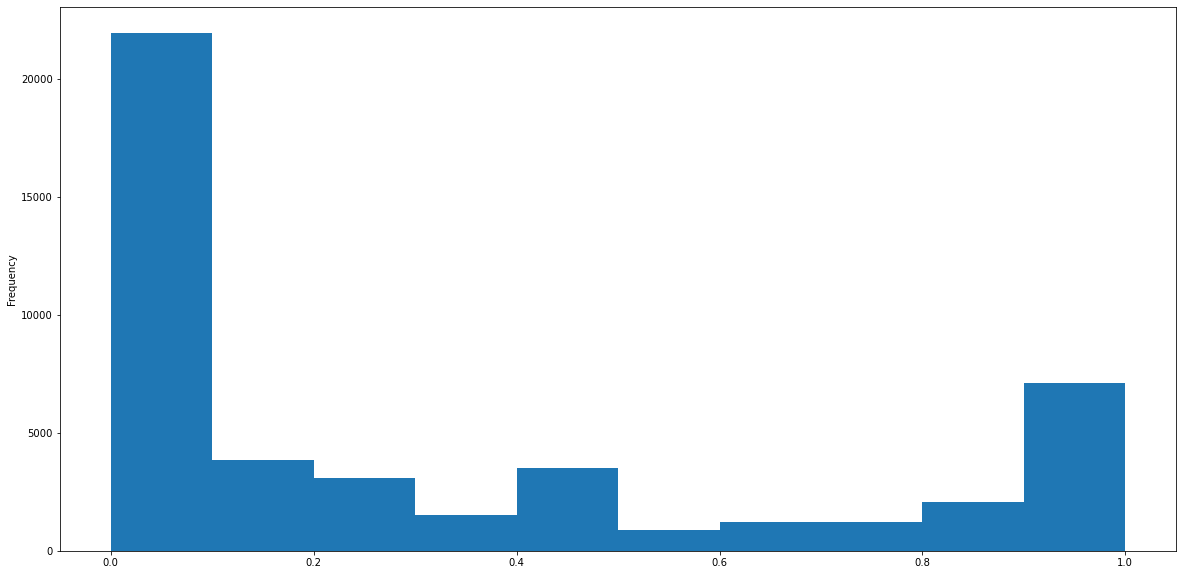

In [58]:
plt = listings_merge.available_year_avg.plot(kind='hist', figsize=(20, 10))

<br/>
<p>Even in a low season like winter, there seems to be low availability.</p>

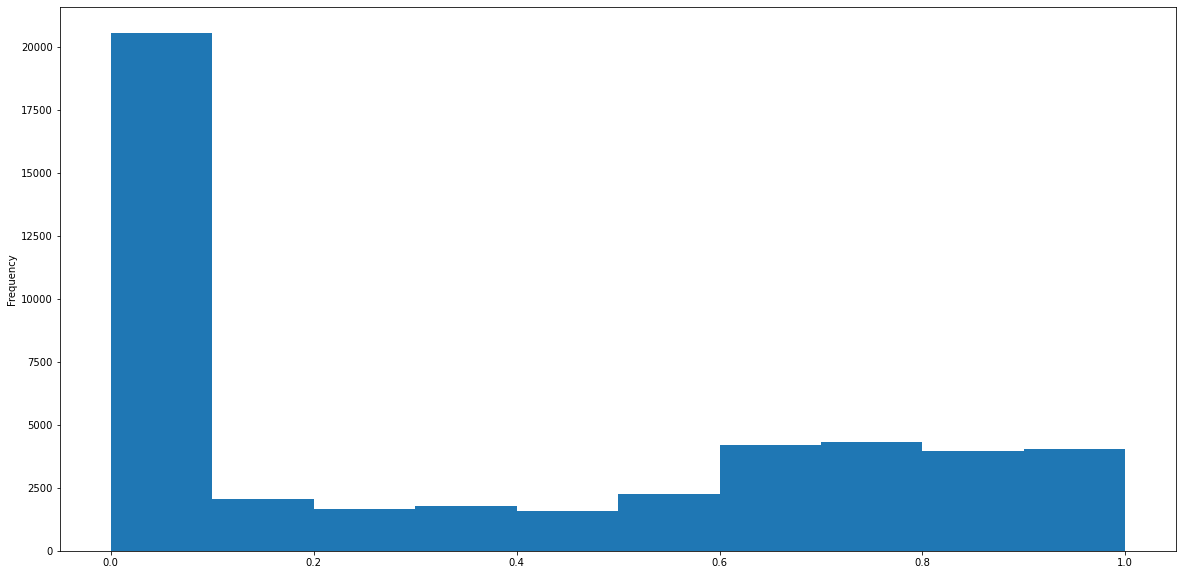

In [59]:
plt = listings_merge.available_winter_avg.plot(kind='hist', figsize=(20, 10))

<br/>
<p>Plotting the log of the minimum nights required we see that it approximates an exponential distribution.</p>

1.000000     10851
2.000000     10507
3.000000      7030
30.000000     3497
4.000000      2952
             ...  
5.178082         1
9.145205         1
4.260274         1
5.547945         1
3.109589         1
Name: min_nights_year_avg, Length: 1477, dtype: int64
30.000000    3497
7.000000     1842
6.000000      670
14.000000     498
10.000000     443
             ... 
13.750685       1
23.641096       1
27.002740       1
25.210959       1
13.808219       1
Name: min_nights_year_avg, Length: 640, dtype: int64


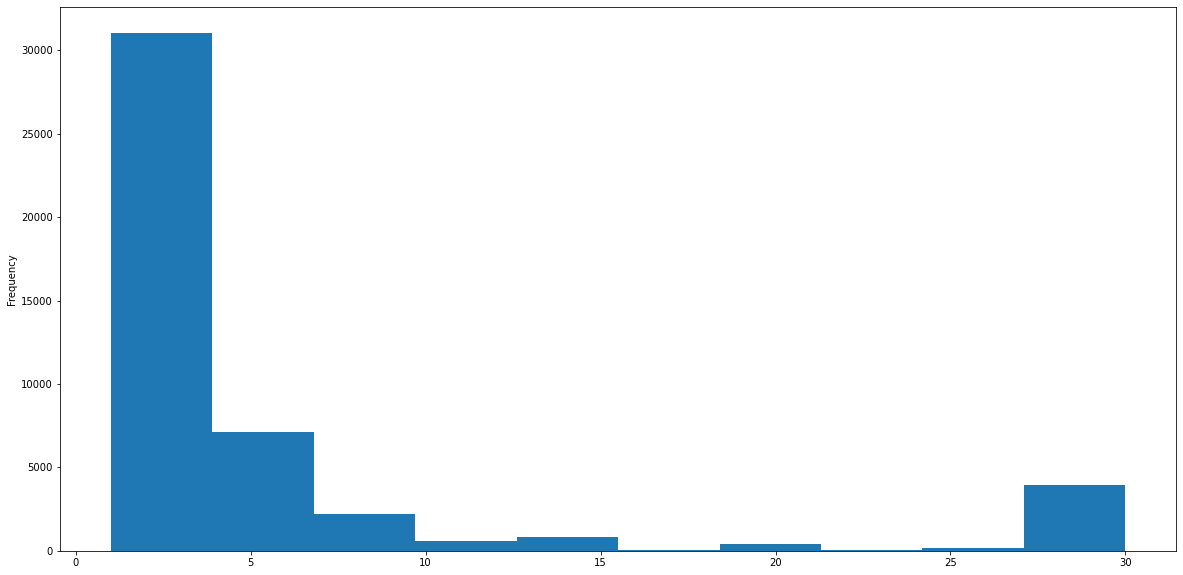

In [60]:
min_nights_75_perc = listings_merge.loc[listings_merge.min_nights_year_avg > 5].min_nights_year_avg.value_counts()
print(listings_merge.min_nights_year_avg.value_counts())
print(min_nights_75_perc)
plt = listings_merge.min_nights_year_avg.plot(kind='hist', figsize=(20, 10))

<br/>
<p>The distribution of annual average prices is somewhat normal with a long tail on the upper end of the price range.  Hopefully removing the high priced outliers earlier is sufficient cleaning.</p>

150.000000    893
100.000000    814
200.000000    675
50.000000     551
60.000000     524
             ... 
97.816438       1
146.139726      1
32.997260       1
101.753425      1
24.000000       1
Name: price_year_avg, Length: 22605, dtype: int64
200.000000    675
250.000000    447
300.000000    237
225.000000    169
350.000000    164
             ... 
208.501370      1
403.150685      1
203.035616      1
185.684932      1
218.109589      1
Name: price_year_avg, Length: 6115, dtype: int64


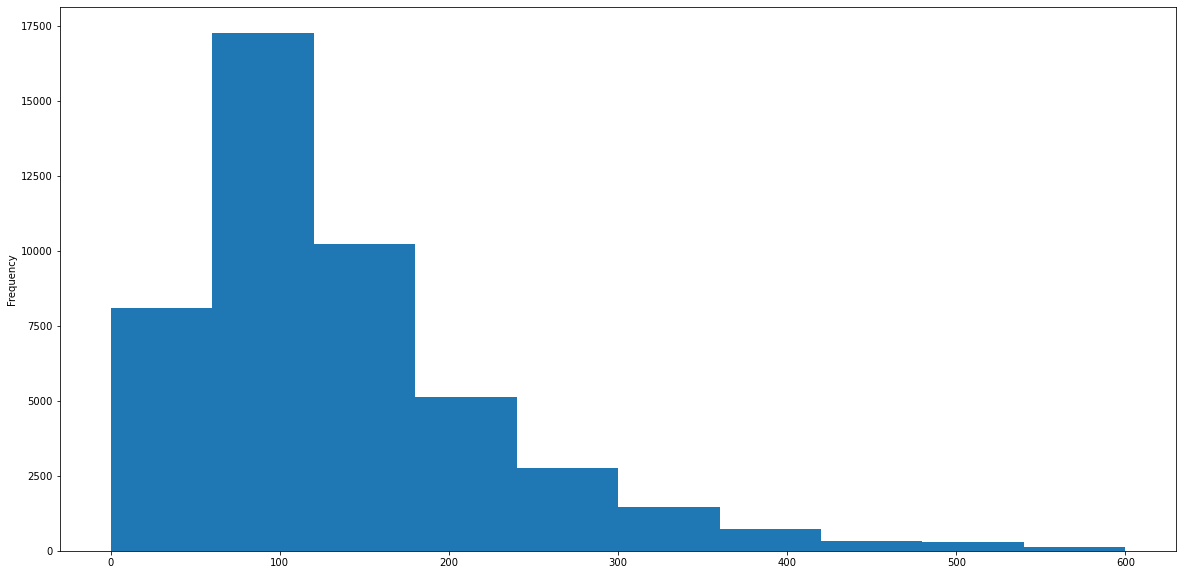

In [61]:
price_75_perc = listings_merge.loc[listings_merge.price_year_avg > 180].price_year_avg.value_counts()
print(listings_merge.price_year_avg.value_counts())
print(price_75_perc)
plt = listings_merge.price_year_avg.plot(kind='hist', figsize=(20, 10))

<br/>
<p>Use a similar method as with the <b>listings_clean</b> table to average over a 200 m radius from listings that have 0, missing, or outlier values for prices.  Again we will not consider <b>room_type</b>.</p>

In [62]:
# https://gizmodo.com/how-precise-is-one-degree-of-longitude-or-latitude-1631241162
# averaging over approximate radius of 200 m from listings
# that have 0, NaN, or greater than threshold price values

lat_diff = 0.002
long_diff = 0.002
cols = list(listings_merge.columns)
def avg_of_neighbors_2(row, col_name):
    item = row[cols.index(col_name)]
    lat = row[4]
    long = row[5]
    if math.isnan(item) or item == 0:
        item = listings_merge[col_name].loc[(listings_clean.latitude > lat - lat_diff) \
            & (listings_merge.latitude < lat + lat_diff) \
            & (listings_merge.longitude > long - long_diff) \
            & (listings_merge.longitude < long + long_diff)].groupby(by=listings_merge.neighbourhood).mean().round().iloc[0]
        row[cols.index(col_name)] = item
    return row

listings_merge = listings_merge.apply(avg_of_neighbors_2, col_name='price_year_avg', axis=1)
listings_merge = listings_merge.apply(avg_of_neighbors_2, col_name='price_winter_avg', axis=1)
listings_merge = listings_merge.apply(avg_of_neighbors_2, col_name='price_spring_avg', axis=1)
listings_merge = listings_merge.apply(avg_of_neighbors_2, col_name='price_summer_avg', axis=1)
listings_merge = listings_merge.apply(avg_of_neighbors_2, col_name='price_fall_avg', axis=1)
listings_merge = listings_merge.apply(avg_of_neighbors_2, col_name='price_jan_avg', axis=1)
listings_merge = listings_merge.apply(avg_of_neighbors_2, col_name='price_jun_avg', axis=1)
listings_merge = listings_merge.apply(avg_of_neighbors_2, col_name='price_dec_avg', axis=1)

<br/>
<p>After some cleanup and taking the log of prices averaged over the year, we are closer to a normal distribution.</p>

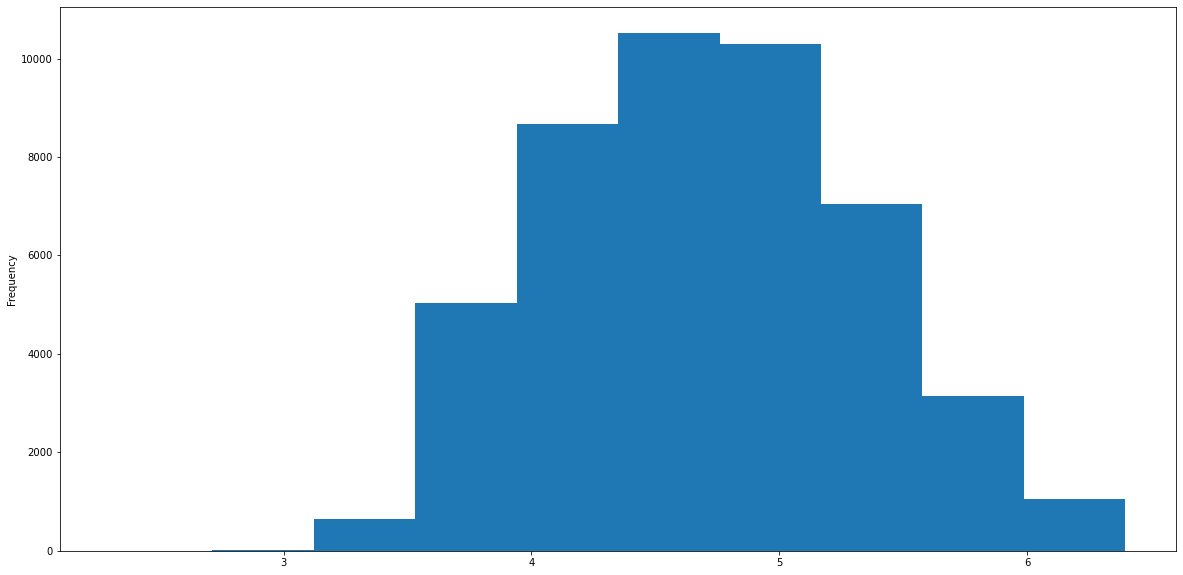

In [63]:
plt = np.log(listings_merge.price_year_avg).plot(kind='hist', figsize=(20, 10))

In [64]:
listings_merge.info()
listings_merge.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46401 entries, 0 to 48913
Columns: 169 entries, id to price_dec_avg
dtypes: float64(31), int64(132), object(6)
memory usage: 61.4+ MB


,id,neighbourhood,latitude,longitude,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,...,min_nights_jun_avg,min_nights_dec_avg,price_year_avg,price_winter_avg,price_spring_avg,price_summer_avg,price_fall_avg,price_jan_avg,price_jun_avg,price_dec_avg
count,4.640100e+04,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000,...,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000,46401.000000
mean,2.100278e+07,107.425788,40.728301,-73.949952,2.814573,1.125073,1.156268,1.506153,25.943600,93.995482,...,5.575560,5.517929,134.753993,130.739236,134.617228,136.993810,136.598513,128.077806,137.202827,135.796790
std,1.235335e+07,69.750280,0.055364,0.047765,1.733721,0.366010,0.697562,0.998258,48.428762,7.472623,...,8.136276,8.018748,91.032588,87.539763,91.883320,93.979081,93.637148,85.864135,94.517379,92.720927
min,2.595000e+03,0.000000,40.499790,-74.247870,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000,...,1.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
25%,9.920626e+06,52.000000,40.688820,-73.982050,2.000000,1.000000,1.000000,1.000000,1.000000,93.000000,...,1.433333,1.580645,70.000000,68.000000,69.543478,70.000000,70.000000,66.612903,70.000000,69.806452
50%,2.106716e+07,96.000000,40.721940,-73.954330,2.000000,1.000000,1.000000,1.000000,6.000000,94.000000,...,2.733333,2.677419,107.547945,105.000000,106.619565,110.000000,109.285714,101.645161,110.000000,109.000000
75%,3.201758e+07,180.000000,40.763100,-73.933100,4.000000,1.000000,1.000000,2.000000,27.000000,99.000000,...,5.000000,5.000000,175.000000,169.644444,175.000000,175.000000,175.000000,163.870968,175.000000,175.000000
max,4.058402e+07,222.000000,40.916860,-73.712990,16.000000,5.000000,10.000000,12.000000,675.000000,100.000000,...,30.000000,30.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000


In [65]:
for c in listings_merge.columns:
    print(c)

id
summary
neighbourhood
neighbourhood_group
latitude
longitude
room_type
accommodates
bathrooms
bedrooms
beds
amenities
number_of_reviews
review_scores_rating
reviews_per_month
entire_home_apt
24_hour_check_in
_toilet
accessible_height_bed
accessible_height_toilet
air_conditioning
air_purifier
baby_bath
baby_monitor
babysitter_recommendations
bathtub
bathtub_with_bath_chair
bbq_grill
beach_essentials
beachfront
bed_linens
breakfast
building_staff
buzzer_wireless_intercom
cable_tv
carbon_monoxide_detector
cats
ceiling_hoist
changing_table
childrens_books_and_toys
childrens_dinnerware
cleaning_before_checkout
coffee_maker
cooking_basics
crib
disabled_parking_spot
dishes_and_silverware
dishwasher
dogs
doorman
dryer
electric_profiling_bed
elevator
essentials
ethernet_connection
ev_charger
extra_pillows_and_blankets
extra_space_around_bed
family_kid_friendly
fire_extinguisher
fireplace_guards
firm_mattress
first_aid_kit
fixed_grab_bars_for_shower
fixed_grab_bars_for_toilet
flat_path_to_gue

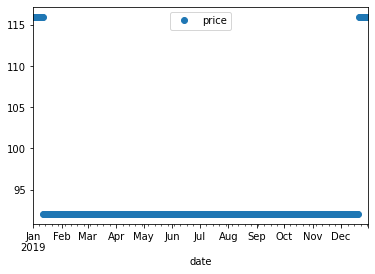

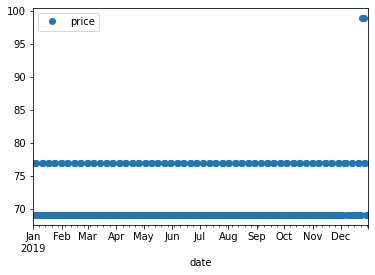

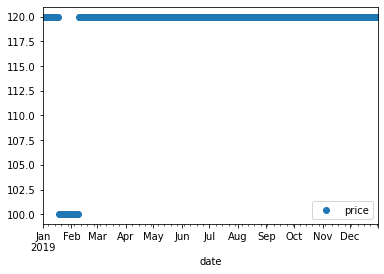

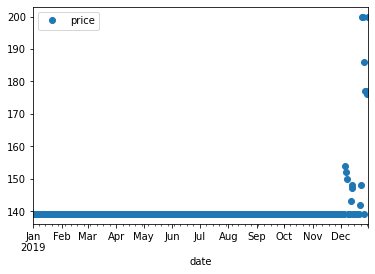

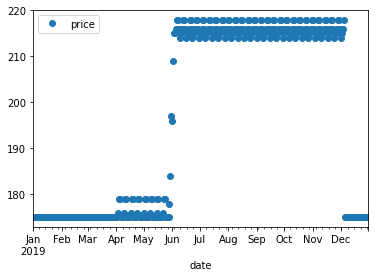

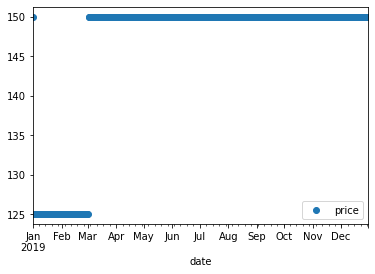

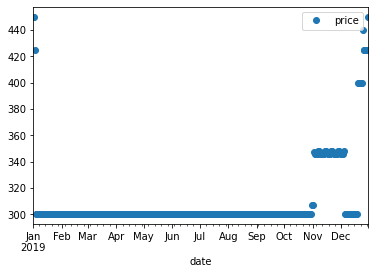

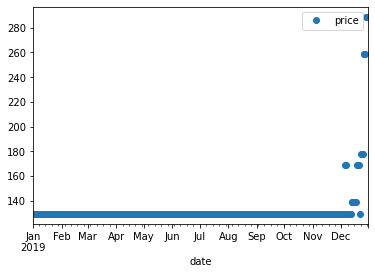

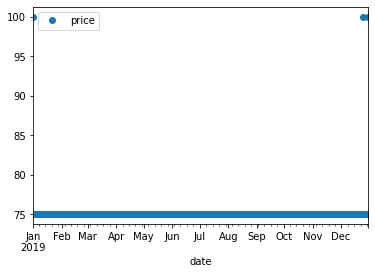

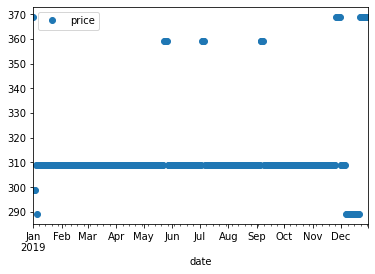

In [66]:
#Bronx 71812, 149777, Brooklyn 8490, 7726, Manhattan 2595, 5238, Queens 45910, 57166, Staten Island 225976, 639199
# listings_clean.loc[
#     (listings_clean.neighbourhood_group == 'Manhattan') &
#     (listings_clean.room_type == 'Entire home/apt')].head()
listings_ids = [71812, 149777, 8490, 7726, 2595, 5238, 45910, 57166, 225976, 639199]
for listing_id in listings_ids:
    calendar_clean.loc[calendar_clean.listing_id == listing_id].sort_values(by='date').plot(
        x='date', y='price', style='o'
    )

<br/>
<p>Let's do a check for any correlated features.</p>

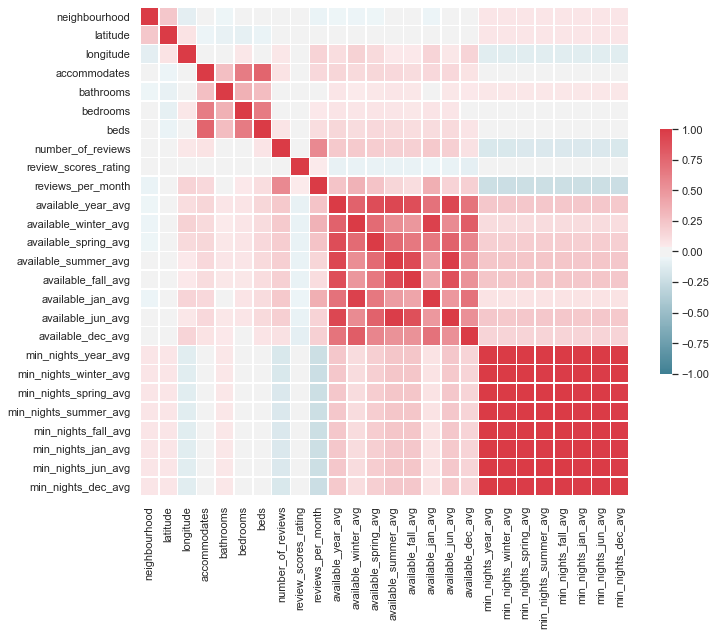

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

features = listings_merge[[
    'summary', 'neighbourhood', 'neighbourhood_group', 'latitude', 'longitude',
    'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'amenities', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month',
    'available_year_avg', 'available_winter_avg', 'available_spring_avg', 'available_summer_avg', 'available_fall_avg',
    'available_jan_avg', 'available_jun_avg', 'available_dec_avg',
    'min_nights_year_avg', 'min_nights_winter_avg', 'min_nights_spring_avg', 'min_nights_summer_avg', 'min_nights_fall_avg',
    'min_nights_jan_avg', 'min_nights_jun_avg', 'min_nights_dec_avg'
]]

fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(features.corr(), cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

<p>We can see that <b>beds</b> is heavily correlated with <b>bedrooms</b>.  We can drop that column.</p>
<br/>

In [68]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_base = listings_merge.drop([
    'id', 'summary', 'neighbourhood', 'neighbourhood_group', 'latitude', 'longitude', 'room_type',
    'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities',
    'number_of_reviews', 'review_scores_rating', 'reviews_per_month', 'entire_home_apt',
    'summary_bigram', 'summary_trigram', 'available_year_avg', 'available_winter_avg', 'available_spring_avg',
    'available_summer_avg', 'available_fall_avg', 'available_jan_avg', 'available_jun_avg', 'available_dec_avg',
    'min_nights_year_avg', 'min_nights_winter_avg', 'min_nights_spring_avg', 'min_nights_summer_avg',
    'min_nights_fall_avg', 'min_nights_jan_avg', 'min_nights_jun_avg', 'min_nights_dec_avg',
    'price_year_avg', 'price_winter_avg', 'price_spring_avg', 'price_summer_avg', 'price_fall_avg',
    'price_jan_avg', 'price_jun_avg', 'price_dec_avg'
], axis=1)
y = listings_merge.price_year_avg

X_train, X_test, y_train, y_test = train_test_split(X_base, y, test_size=.25, random_state=42, shuffle=True)

clf = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.1,
    max_depth=8,
    n_estimators=200,
    cv=5,
    n_jobs=-1
)

clf.fit(X_train, y_train)
print('Feature set: all amenities')
print('Target label: price_year_avg')
print('Gradient boost R^2:', clf.score(X_test, y_test))
print('Gradient boost MAE:', mean_absolute_error(y_test, clf.predict(X_test)))

Feature set: all amenities
Target label: price_year_avg
Gradient boost R^2: 0.3271167953387577
Gradient boost MAE: 52.49823033454533


In [69]:
from sklearn.feature_selection import SelectKBest, f_regression
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

kbest = 0
max_score = 0
for k in [125, 124, 123, 122, 121, 100, 75]:
    X_base = listings_merge.drop([
        'id', 'summary', 'neighbourhood', 'neighbourhood_group', 'latitude', 'longitude', 'room_type',
        'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities',
        'number_of_reviews', 'review_scores_rating', 'reviews_per_month', 'entire_home_apt',
        'summary_bigram', 'summary_trigram', 'available_year_avg', 'available_winter_avg', 'available_spring_avg',
        'available_summer_avg', 'available_fall_avg', 'available_jan_avg', 'available_jun_avg', 'available_dec_avg',
        'min_nights_year_avg', 'min_nights_winter_avg', 'min_nights_spring_avg', 'min_nights_summer_avg',
        'min_nights_fall_avg', 'min_nights_jan_avg', 'min_nights_jun_avg', 'min_nights_dec_avg',
        'price_year_avg', 'price_winter_avg', 'price_spring_avg', 'price_summer_avg', 'price_fall_avg',
        'price_jan_avg', 'price_jun_avg', 'price_dec_avg'
    ], axis=1)
    y = listings_merge.price_year_avg

    selector = SelectKBest(f_regression, k=k)
    X_kbest = selector.fit_transform(X_base, y)

    X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=.25, random_state=42, shuffle=True)

    clf = XGBRegressor(
        objective='reg:squarederror',
        learning_rate=0.1,
        max_depth=8,
        n_estimators=200,
        cv=5,
        n_jobs=-1
    )

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    if score > max_score:
        max_score = score
        kbest = k
    
    print('Feature set:', k, 'amenities')
    print('Target label: price_year_avg')
    print('Gradient boost R^2:', score)
    print('Gradient boost MAE:', mean_absolute_error(y_test, clf.predict(X_test)))

Feature set: 125 amenities
Target label: price_year_avg
Gradient boost R^2: 0.3302098141566965
Gradient boost MAE: 52.37640539066352
Feature set: 124 amenities
Target label: price_year_avg
Gradient boost R^2: 0.3302098141566965
Gradient boost MAE: 52.37640539066352
Feature set: 123 amenities
Target label: price_year_avg
Gradient boost R^2: 0.33089882677495297
Gradient boost MAE: 52.36621085839375
Feature set: 122 amenities
Target label: price_year_avg
Gradient boost R^2: 0.3290219129416573
Gradient boost MAE: 52.404551491233875
Feature set: 121 amenities
Target label: price_year_avg
Gradient boost R^2: 0.33181225819752147
Gradient boost MAE: 52.31763365106431
Feature set: 100 amenities
Target label: price_year_avg
Gradient boost R^2: 0.32868170919935535
Gradient boost MAE: 52.36428205952893
Feature set: 75 amenities
Target label: price_year_avg
Gradient boost R^2: 0.312681918803864
Gradient boost MAE: 53.13193605545682


In [70]:
X_base = listings_merge.drop([
    'id', 'summary', 'neighbourhood', 'neighbourhood_group', 'latitude', 'longitude', 'room_type',
    'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities',
    'number_of_reviews', 'review_scores_rating', 'reviews_per_month', 'entire_home_apt',
    'summary_bigram', 'summary_trigram', 'available_year_avg', 'available_winter_avg', 'available_spring_avg',
    'available_summer_avg', 'available_fall_avg', 'available_jan_avg', 'available_jun_avg', 'available_dec_avg',
    'min_nights_year_avg', 'min_nights_winter_avg', 'min_nights_spring_avg', 'min_nights_summer_avg',
    'min_nights_fall_avg', 'min_nights_jan_avg', 'min_nights_jun_avg', 'min_nights_dec_avg',
    'price_year_avg', 'price_winter_avg', 'price_spring_avg', 'price_summer_avg', 'price_fall_avg',
    'price_jan_avg', 'price_jun_avg', 'price_dec_avg'
], axis=1)
y = listings_merge.price_year_avg

selector = SelectKBest(f_regression, k=kbest)
selector.fit(X_base, y)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
amenities_sparse = X_base.iloc[:,cols]

listings_merge = listings_merge[[
    'id', 'summary', 'neighbourhood', 'neighbourhood_group', 'latitude', 'longitude', 'room_type',
    'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities',
    'number_of_reviews', 'review_scores_rating', 'reviews_per_month', 'entire_home_apt',
    'summary_bigram', 'summary_trigram', 'available_year_avg', 'available_winter_avg', 'available_spring_avg',
    'available_summer_avg', 'available_fall_avg', 'available_jan_avg', 'available_jun_avg', 'available_dec_avg',
    'min_nights_year_avg', 'min_nights_winter_avg', 'min_nights_spring_avg', 'min_nights_summer_avg',
    'min_nights_fall_avg', 'min_nights_jan_avg', 'min_nights_jun_avg', 'min_nights_dec_avg',
    'price_year_avg', 'price_winter_avg', 'price_spring_avg', 'price_summer_avg', 'price_fall_avg',
    'price_jan_avg', 'price_jun_avg', 'price_dec_avg'
]].join(amenities_sparse)

In [71]:
for c in listings_merge.columns:
    print(c)

id
summary
neighbourhood
neighbourhood_group
latitude
longitude
room_type
accommodates
bathrooms
bedrooms
beds
amenities
number_of_reviews
review_scores_rating
reviews_per_month
entire_home_apt
summary_bigram
summary_trigram
available_year_avg
available_winter_avg
available_spring_avg
available_summer_avg
available_fall_avg
available_jan_avg
available_jun_avg
available_dec_avg
min_nights_year_avg
min_nights_winter_avg
min_nights_spring_avg
min_nights_summer_avg
min_nights_fall_avg
min_nights_jan_avg
min_nights_jun_avg
min_nights_dec_avg
price_year_avg
price_winter_avg
price_spring_avg
price_summer_avg
price_fall_avg
price_jan_avg
price_jun_avg
price_dec_avg
24_hour_check_in
_toilet
accessible_height_bed
accessible_height_toilet
air_conditioning
baby_bath
baby_monitor
babysitter_recommendations
bathtub
bathtub_with_bath_chair
bbq_grill
beach_essentials
beachfront
bed_linens
building_staff
buzzer_wireless_intercom
cable_tv
carbon_monoxide_detector
cats
changing_table
childrens_books_and_

In [72]:
listings_merge_backup = listings_merge

In [73]:
listings_merge = listings_merge_backup

<p>Drop any non-numerical data, features that may correlate with other features, and data that may not correlate with price labels.</p>

In [74]:
listings_merge = listings_merge.drop(['beds'], axis=1)
listings_merge = listings_merge.drop(['id', 'room_type', 'neighbourhood_group'], axis=1)
listings_merge = listings_merge.drop(['reviews_per_month'], axis=1)
listings_merge = listings_merge.drop(['number_of_reviews'], axis=1)
listings_merge = listings_merge.drop(['summary', 'summary_bigram', 'summary_trigram', 'amenities'], axis=1)

# listings_merge = listings_merge.drop(['accommodates'], axis=1)
# listings_merge = listings_merge.drop(['neighbourhood'], axis=1)
listings_merge = listings_merge.drop(['review_scores_rating'], axis=1)

In [75]:
X_base = listings_merge.drop([
    'price_year_avg', 'price_winter_avg', 'price_spring_avg', 'price_summer_avg', 'price_fall_avg',
    'price_jan_avg', 'price_jun_avg', 'price_dec_avg',
    'available_year_avg', 'available_winter_avg', 'available_spring_avg', 'available_summer_avg',
    'available_fall_avg', 'available_jan_avg', 'available_jun_avg', 'available_dec_avg',
    'min_nights_year_avg', 'min_nights_winter_avg', 'min_nights_spring_avg', 'min_nights_summer_avg',
    'min_nights_fall_avg', 'min_nights_jan_avg', 'min_nights_jun_avg', 'min_nights_dec_avg',
], axis=1)
X_base.shape

(46401, 128)

<p>Perhaps we can add more features like monthly or holiday averages for availability, minimum nights required, and price, but that would make the table size explode!<p>

<h2>Modeling data with prices as target labels</h2>

<p>Now that we've cleaned up the data, let's look at several possible models of linear and non-linear type.  We will use average price of each listing over the year 2019, as well as seasonal average price as the target labels.  The easiest ones to get started with are Linear Regression and Random Forest.</p>

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

combo_list = [
    ['available_year_avg', 'min_nights_year_avg', 'price_year_avg'],
    ['available_winter_avg', 'min_nights_winter_avg', 'price_winter_avg'],
    ['available_spring_avg', 'min_nights_spring_avg', 'price_spring_avg'],
    ['available_summer_avg', 'min_nights_summer_avg', 'price_summer_avg'],
    ['available_fall_avg', 'min_nights_fall_avg', 'price_fall_avg'],
    ['available_jan_avg', 'min_nights_jan_avg', 'price_jan_avg'],
    ['available_jun_avg', 'min_nights_jun_avg', 'price_jun_avg'],
    ['available_dec_avg', 'min_nights_dec_avg', 'price_dec_avg']
]

for combo in combo_list:
    X_base = listings_merge.drop([
        'price_year_avg', 'price_winter_avg', 'price_spring_avg', 'price_summer_avg', 'price_fall_avg',
        'price_jan_avg', 'price_jun_avg', 'price_dec_avg',
        'available_year_avg', 'available_winter_avg', 'available_spring_avg', 'available_summer_avg',
        'available_fall_avg', 'available_jan_avg', 'available_jun_avg', 'available_dec_avg',
        'min_nights_year_avg', 'min_nights_winter_avg', 'min_nights_spring_avg', 'min_nights_summer_avg',
        'min_nights_fall_avg', 'min_nights_jan_avg', 'min_nights_jun_avg', 'min_nights_dec_avg',
    ], axis=1)
    X_base[combo[0]] = listings_merge[combo[0]]
    X_base[combo[1]] = listings_merge[combo[1]]
    y = listings_merge[combo[2]]
    
    X_train, X_test, y_train, y_test = train_test_split(X_base, y, test_size=.25, random_state=42, shuffle=True)
    print('Target label:', combo[2])
    
    clf = LinearRegression(n_jobs=-1)
    clf.fit(X_train, y_train)
    print("Linear regression R^2:", clf.score(X_test, y_test))
    print("Linear regression MAE:", mean_absolute_error(y_test, clf.predict(X_test)))

Target label: price_year_avg
Linear regression R^2: 0.5689275680869255
Linear regression MAE: 41.388996124171534
Target label: price_winter_avg
Linear regression R^2: 0.5480827627279921
Linear regression MAE: 40.09976100528621
Target label: price_spring_avg
Linear regression R^2: 0.5593241906459425
Linear regression MAE: 41.887375788418716
Target label: price_summer_avg
Linear regression R^2: 0.5688013863726948
Linear regression MAE: 42.72667892125183
Target label: price_fall_avg
Linear regression R^2: 0.5597845013854907
Linear regression MAE: 42.909202131401635
Target label: price_jan_avg
Linear regression R^2: 0.521234665914204
Linear regression MAE: 40.10177915955635
Target label: price_jun_avg
Linear regression R^2: 0.5675824149236617
Linear regression MAE: 43.00537773857805
Target label: price_dec_avg
Linear regression R^2: 0.5695307647058341
Linear regression MAE: 42.12108110548496


In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

combo_list = [
    ['available_year_avg', 'min_nights_year_avg', 'price_year_avg'],
    ['available_winter_avg', 'min_nights_winter_avg', 'price_winter_avg'],
    ['available_spring_avg', 'min_nights_spring_avg', 'price_spring_avg'],
    ['available_summer_avg', 'min_nights_summer_avg', 'price_summer_avg'],
    ['available_fall_avg', 'min_nights_fall_avg', 'price_fall_avg'],
    ['available_jan_avg', 'min_nights_jan_avg', 'price_jan_avg'],
    ['available_jun_avg', 'min_nights_jun_avg', 'price_jun_avg'],
    ['available_dec_avg', 'min_nights_dec_avg', 'price_dec_avg']
]

for combo in combo_list:
    X_base = listings_merge.drop([
        'price_year_avg', 'price_winter_avg', 'price_spring_avg', 'price_summer_avg', 'price_fall_avg',
        'price_jan_avg', 'price_jun_avg', 'price_dec_avg',
        'available_year_avg', 'available_winter_avg', 'available_spring_avg', 'available_summer_avg',
        'available_fall_avg', 'available_jan_avg', 'available_jun_avg', 'available_dec_avg',
        'min_nights_year_avg', 'min_nights_winter_avg', 'min_nights_spring_avg', 'min_nights_summer_avg',
        'min_nights_fall_avg', 'min_nights_jan_avg', 'min_nights_jun_avg', 'min_nights_dec_avg',
    ], axis=1)
    X_base[combo[0]] = listings_merge[combo[0]]
    X_base[combo[1]] = listings_merge[combo[1]]
    y = listings_merge[combo[2]]
    
    X_train, X_test, y_train, y_test = train_test_split(X_base, y, test_size=.25, random_state=42, shuffle=True)
    print('Target label:', combo[2])
    
    clf = RandomForestRegressor(n_jobs=-1)
    clf.fit(X_train, y_train)
    print("Random forest R^2:", clf.score(X_test, y_test))
    print("Random forest MAE:", mean_absolute_error(y_test, clf.predict(X_test)))

Target label: price_year_avg
Random forest R^2: 0.7033415956132286
Random forest MAE: 31.673876765465423
Target label: price_winter_avg
Random forest R^2: 0.6806613764811957
Random forest MAE: 31.392409581549483
Target label: price_spring_avg
Random forest R^2: 0.6923981534560382
Random forest MAE: 32.31932196624729
Target label: price_summer_avg
Random forest R^2: 0.6970145568149206
Random forest MAE: 32.87465006764784
Target label: price_fall_avg
Random forest R^2: 0.6910935662577848
Random forest MAE: 33.10052684923903
Target label: price_jan_avg
Random forest R^2: 0.6447461084706205
Random forest MAE: 32.36727782087751
Target label: price_jun_avg
Random forest R^2: 0.6995497603585954
Random forest MAE: 32.969387495330864
Target label: price_dec_avg
Random forest R^2: 0.7053757320549465
Random forest MAE: 32.20483462215437


<p>We can see that Random Forest performs much better than Linear Regression in terms of R<sup>2</sup> score.</p>

<br/>
<p>Perhaps there will be an incremental improvement in R<sup>2</sup> by using Gradient Boosting (XGBoost in this case).</p>

In [78]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

combo_list = [
    ['available_year_avg', 'min_nights_year_avg', 'price_year_avg'],
    ['available_winter_avg', 'min_nights_winter_avg', 'price_winter_avg'],
    ['available_spring_avg', 'min_nights_spring_avg', 'price_spring_avg'],
    ['available_summer_avg', 'min_nights_summer_avg', 'price_summer_avg'],
    ['available_fall_avg', 'min_nights_fall_avg', 'price_fall_avg'],
    ['available_jan_avg', 'min_nights_jan_avg', 'price_jan_avg'],
    ['available_jun_avg', 'min_nights_jun_avg', 'price_jun_avg'],
    ['available_dec_avg', 'min_nights_dec_avg', 'price_dec_avg']
]

for combo in combo_list:
    X_base = listings_merge.drop([
        'price_year_avg', 'price_winter_avg', 'price_spring_avg', 'price_summer_avg', 'price_fall_avg',
        'price_jan_avg', 'price_jun_avg', 'price_dec_avg',
        'available_year_avg', 'available_winter_avg', 'available_spring_avg', 'available_summer_avg',
        'available_fall_avg', 'available_jan_avg', 'available_jun_avg', 'available_dec_avg',
        'min_nights_year_avg', 'min_nights_winter_avg', 'min_nights_spring_avg', 'min_nights_summer_avg',
        'min_nights_fall_avg', 'min_nights_jan_avg', 'min_nights_jun_avg', 'min_nights_dec_avg',
    ], axis=1)
    X_base[combo[0]] = listings_merge[combo[0]]
    X_base[combo[1]] = listings_merge[combo[1]]
    y = listings_merge[combo[2]]
    
    X_train, X_test, y_train, y_test = train_test_split(X_base, y, test_size=.25, random_state=42, shuffle=True)

    clf = XGBRegressor(
        objective='reg:squarederror',
        learning_rate=0.1,
        max_depth=8,
        n_estimators=200,
        cv=5,
        n_jobs=-1
    )

    clf.fit(X_train, y_train)
    print('Target label:', combo[2])
    print('Gradient boost R^2:', clf.score(X_test, y_test))
    print('Gradient boost MAE:', mean_absolute_error(y_test, clf.predict(X_test)))

Target label: price_year_avg
Gradient boost R^2: 0.7196504259042746
Gradient boost MAE: 30.861888491579823
Target label: price_winter_avg
Gradient boost R^2: 0.6962641678924537
Gradient boost MAE: 30.485536557502382
Target label: price_spring_avg
Gradient boost R^2: 0.7073578464513159
Gradient boost MAE: 31.56595823786541
Target label: price_summer_avg
Gradient boost R^2: 0.7100661546418274
Gradient boost MAE: 32.105848972908454
Target label: price_fall_avg
Gradient boost R^2: 0.7038018402721605
Gradient boost MAE: 32.41064677333151
Target label: price_jan_avg
Gradient boost R^2: 0.6616858070479053
Gradient boost MAE: 31.582232889899746
Target label: price_jun_avg
Gradient boost R^2: 0.7138962840290604
Gradient boost MAE: 32.18588825157106
Target label: price_dec_avg
Gradient boost R^2: 0.7190199229140362
Gradient boost MAE: 31.396938718872057


<p>We get decent scores from a Gradient Boost model.</p>


<p>Now apply deep learning with a neural network made up mainly of dense layers.</p>

In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

combo_list = [
    ['available_year_avg', 'min_nights_year_avg', 'price_year_avg'],
#     ['available_winter_avg', 'min_nights_winter_avg', 'price_winter_avg'],
#     ['available_spring_avg', 'min_nights_spring_avg', 'price_spring_avg'],
#     ['available_summer_avg', 'min_nights_summer_avg', 'price_summer_avg'],
#     ['available_fall_avg', 'min_nights_fall_avg', 'price_fall_avg'],
#     ['available_jan_avg', 'min_nights_jan_avg', 'price_jan_avg'],
#     ['available_jun_avg', 'min_nights_jun_avg', 'price_jun_avg'],
#     ['available_dec_avg', 'min_nights_dec_avg', 'price_dec_avg']
]

es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=2)
adam = Adam(lr=0.001)
sgd = SGD(lr=0.001)

def base_model():
    model = Sequential()
    model.add(Dense(150, input_dim=130, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mae'])
    return model

for combo in combo_list:
    X_base = listings_merge.drop([
        'price_year_avg', 'price_winter_avg', 'price_spring_avg', 'price_summer_avg', 'price_fall_avg',
        'price_jan_avg', 'price_jun_avg', 'price_dec_avg',
        'available_year_avg', 'available_winter_avg', 'available_spring_avg', 'available_summer_avg',
        'available_fall_avg', 'available_jan_avg', 'available_jun_avg', 'available_dec_avg',
        'min_nights_year_avg', 'min_nights_winter_avg', 'min_nights_spring_avg', 'min_nights_summer_avg',
        'min_nights_fall_avg', 'min_nights_jan_avg', 'min_nights_jun_avg', 'min_nights_dec_avg',
    ], axis=1)
    X_base[combo[0]] = listings_merge[combo[0]]
    X_base[combo[1]] = listings_merge[combo[1]]
    y = listings_merge[combo[2]]
    
    scaler = MinMaxScaler()
    X_scale = scaler.fit_transform(X_base.values)
    
    X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=.25, random_state=42, shuffle=True)

    
    clf = KerasRegressor(build_fn=base_model, epochs=100, batch_size=100, verbose=1, callbacks=[es], use_multiprocessing=1)
#     kfold = KFold(n_splits=5)
#     results = cross_val_score(clf, X_train, y_train, cv=kfold)
#     print(results)

    clf.fit(X_train, y_train)
    print('Target label:', combo[2])
    print('Neural network MAE:', mean_absolute_error(y_test, clf.predict(X_test)))

Train on 34800 samples
Epoch 1/100
34800/34800 [==============================] - 1s 30us/sample - loss: 7236.4490 - mae: 58.1004
Epoch 2/100
34800/34800 [==============================] - 1s 15us/sample - loss: 4413.3133 - mae: 45.1005
Epoch 3/100
34800/34800 [==============================] - 1s 15us/sample - loss: 4184.6512 - mae: 43.6168
Epoch 4/100
34800/34800 [==============================] - 1s 15us/sample - loss: 4032.9982 - mae: 42.4688
Epoch 5/100
34800/34800 [==============================] - 1s 15us/sample - loss: 3912.5209 - mae: 41.88560s - loss: 3916.6001 - mae: 41.929
Epoch 6/100
34800/34800 [==============================] - 1s 15us/sample - loss: 3841.3972 - mae: 41.2480
Epoch 7/100
34800/34800 [==============================] - 1s 15us/sample - loss: 3756.1093 - mae: 40.8539
Epoch 8/100
34800/34800 [==============================] - 1s 15us/sample - loss: 3677.4990 - mae: 40.4012
Epoch 9/100
34800/34800 [==============================] - 1s 15us/sample - loss: 3598.